# Modélisation des probas

In [53]:
! pip install pandas

In [54]:
import os
import pandas as pd
os.getcwd()

path = "c:\\Users\\esthelle.kuissu\\OneDrive - Exiom Partners\\Documents\\Code_rapport_stage\\Bases sinistres"

datap = pd.read_csv(path + "\\bdd_sinistres_MODELPROBA.csv", sep=";", encoding="utf-8")

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_2976\4172452751.py:7: DtypeWarning: Columns (24,83) have mixed types. Specify dtype option on import or set low_memory=False.
  datap = pd.read_csv(path + "\\bdd_sinistres_MODELPROBA.csv", sep=";", encoding="utf-8")


In [55]:
import pandas as pd
import numpy as np

# --------------------------------------------------------------------------
# 0. Noms des colonnes montants
# --------------------------------------------------------------------------
mo_col    = "MT_MO_REPARABLE"
ip_col    = "MT_IP_REPARABLE"
piece_col = "MT_PIECES_REPARABLE"

# --------------------------------------------------------------------------
# 1. Variable texte brute : combinaison exacte des postes > 0
# --------------------------------------------------------------------------
def structure_postes(row):
    postes = []
    if row[mo_col]    > 0: postes.append("MO")
    if row[ip_col]    > 0: postes.append("IP")
    if row[piece_col] > 0: postes.append("PIECES")
    return "+".join(postes) if postes else "AUCUN"

datap["structure_sinistre"] = datap.apply(structure_postes, axis=1)

# --------------------------------------------------------------------------
# 2. Fusion souhaitée → nouvelle variable `structure_grp`
#    • IP  regroupe  {IP, MO+IP}
#    • PIECES regroupe {PIECES, MO+PIECES}
# --------------------------------------------------------------------------
map_fusion = {
    "MO"              : "MO+1AUTRE",
    "IP"              : "MO+1AUTRE",
    "MO+IP"           : "MO+1AUTRE",          # fusion ici
    "PIECES"          : "MO+1AUTRE",
    "MO+PIECES"       : "MO+1AUTRE",      # fusion ici
    "IP+PIECES"       : "MO+1AUTRE",
    "MO+IP+PIECES"    : "MO+IP+PIECES",
    "AUCUN"           : "AUCUN"
}

datap["structure_grp"] = datap["structure_sinistre"].map(map_fusion)

# --------------------------------------------------------------------------
# 3. Identifiant numérique  (tu peux changer les numéros si besoin)
# --------------------------------------------------------------------------
map_id = {
    "MO+1AUTRE"              : 1,
    "MO+IP+PIECES"          : 2,
}

datap["structure_id"] = datap["structure_grp"].map(map_id)

# --------------------------------------------------------------------------
# 4. Table de fréquence : pour contrôle
# --------------------------------------------------------------------------
freq = (
    datap.groupby(["structure_id", "structure_grp"])
         .size()
         .reset_index(name="n_sinistres")
         .sort_values("structure_id")
)

print(freq.to_string(index=False))


 structure_id structure_grp  n_sinistres
            1     MO+1AUTRE        81748
            2  MO+IP+PIECES       920097


In [56]:
print(list(datap.columns))

['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'age', 'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest', 'aac', 'date_sortie_veh', 'age_veh', 'usage2', 'franch', 'rachat_francBG', 'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros', 'segment', 'energ', 'num_sra', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'exercice', 'GARANTIE_HOST', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_CHARGE_NETTE', 'MT_REGLEMENT_SIN', 'MT_REGLEMENT_COM', 'MT_ABANDON_RECOURS', 'MT_FRAIS_HONO', 'MT_PROVISIONS', 'MT_RECOURS_TOTAL', 'MT_ESTIMATION_RECOURS_RESTANTS', 'MT_AVANCE_RECOURS',

In [57]:
import pandas as pd

# Création des colonnes indicatrices (uint8 → 0/1)
dummies = pd.get_dummies(datap['exercice'], prefix='year').astype(int)

# (Optionnel) on retire l’année de base 2019 pour éviter la colinéarité
dummies = dummies.drop(columns=['year_2019'])

# Fusion avec ton DataFrame
datap = pd.concat([datap, dummies], axis=1)


In [58]:
import pandas as pd

# 0) ton DataFrame initial ----------------------------------------------------
# df = pd.read_csv("ton_fichier.csv")  # ou déjà présent en mémoire

# 1) liste explicite de TOUTES tes variables (copiée depuis ta question) -----
all_vars = [
    'cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp',
    'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais',
    'age', 'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest',
    'aac', 'date_sortie_veh', 'age_veh', 'usage2', 'franch', 'rachat_francBG',
    'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros', 'segment',
    'energ', 'num_sra', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid',
    'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite',
    'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup',
    'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'bureau_ratt',
    'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'exercice',
    'GARANTIE_HOST', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_CHARGE_NETTE',
    'MT_REGLEMENT_SIN', 'MT_REGLEMENT_COM', 'MT_ABANDON_RECOURS', 'MT_FRAIS_HONO',
    'MT_PROVISIONS', 'MT_RECOURS_TOTAL', 'MT_ESTIMATION_RECOURS_RESTANTS',
    'MT_AVANCE_RECOURS', 'MT_AVANCE_RECOURS_RECOURUS', 'MT_PAIEMENTS',
    'MT_CHARGE_BRUTE_ECO', 'MT_CHARGE_NETTE_ECO', 'ZN_NO_RAPPORT_EXPTIS',
    'MT_VAL_REMPL_VEH_TTC', 'MT_TOTAL_REPARABLE', 'NB_REP', 'MT_MO_REPARABLE',
    'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'MT_IP_REPARABLE',
    'NBHH_IP_REPARABLE', 'MT_PIECES_REPARABLE', 'NB_PIECES_REEMPLOI',
    'MT_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP',
    'RE_AVEC_PIECE_REMPL_MP', 'MT_REMISE', 'MT_FORFAIT', 'MT_FORFAIT_ERD',
    'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'DPT_REP', '_RESEAU_',
    'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'veh_info_manquante', 'date_ord',
    'date_sortie_veh_imputee', 'annee_sortie_veh', 'date_nais_f',
    'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g',
    'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g',
    'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g',
    'marq_g', 'garag_g', 'Region', 'Zone', 'structure_sinistre', 'structure_id',
    'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024'
]

# 2) distinguer variables montants vs non montants ---------------------------
montants     = [v for v in all_vars if v.startswith('MT_')]
non_montants = [v for v in all_vars if v not in montants]

print(f"{len(montants)} variables de montant supprimées.")
print(f"{len(non_montants)} variables conservées.")

# 3) créer la base sans montants ---------------------------------------------
datap_sm = datap[non_montants].copy()

# 4) enregistrer si besoin ----------------------------------------------------
#datap_sm.to_csv("baseproba_sans_montants.csv", index=False, encoding="utf-8")


24 variables de montant supprimées.
116 variables conservées.


In [59]:
datap_sm.head()

,cle_sin,date_evt,date_evt_decla,clos,sans_suite,quart_resp,date_premsous,date_dernrempl,formule_ratt,cond_indet,...,garag_g,Region,Zone,structure_sinistre,structure_id,year_2020,year_2021,year_2022,year_2023,year_2024
0,191840439C A 018,02/01/2019,04/01/2019,O,N,plus_50pc,29/06/1987,09/01/2015,PRO,N,...,Petit garage,Nouvelle-Aquitaine,Ouest,MO+IP+PIECES,2,0,0,0,0,0
1,191840048C A 001,01/01/2019,02/01/2019,N,N,plus_50pc,10/11/2018,2023-12-31 00:00:00,PRO,N,...,Garage moyen,Pays de la Loire,Ouest,MO+IP+PIECES,2,0,0,0,0,0
2,191840501C A 010,03/01/2019,04/01/2019,O,N,plus_50pc,13/07/2016,03/04/2018,PRO,N,...,Garage moyen,Pays de la Loire,Ouest,MO+IP+PIECES,2,0,0,0,0,0
3,191840759C A 001,06/01/2019,07/01/2019,O,N,plus_50pc,25/10/2015,2023-12-31 00:00:00,PRO,N,...,Garage moyen,Pays de la Loire,Ouest,MO+IP+PIECES,2,0,0,0,0,0
4,191840075AV A 003,01/01/2019,02/01/2019,O,N,plus_50pc,10/06/2015,11/03/2016,PRO,N,...,Garage moyen,NaN,I,MO+IP+PIECES,2,0,0,0,0,0


In [60]:
print(list(datap_sm.columns))

['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'age', 'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest', 'aac', 'date_sortie_veh', 'age_veh', 'usage2', 'franch', 'rachat_francBG', 'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros', 'segment', 'energ', 'num_sra', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'exercice', 'GARANTIE_HOST', 'ZN_NO_RAPPORT_EXPTIS', 'NB_REP', 'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'NBHH_IP_REPARABLE', 'NB_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP', 'RE_AVEC_PIECE_REMPL_MP', 'LIB_CHOC', 'LIB_INTENS', 'GA

In [61]:
# ---------------------------------------------
# 1. Liste des variables à exclure
# ---------------------------------------------
exclure = [
    'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous',
    'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'Zone',
    'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest',
    'date_sortie_veh', 'usage2', 'franch', 'rachat_francBG',
    'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros',
    'segment', 'energ', 'num_sra', 'cylin', 'pdyne', 'pfisc', 'vites',
    'pvid', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur',
    'systeme', 'exercice', 'GARANTIE_HOST', 'ZN_NO_RAPPORT_EXPTIS', 'NB_REP',
    'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'NBHH_IP_REPARABLE',
    'NB_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP',
    'RE_AVEC_PIECE_REMPL_MP', 'veh_info_manquante', 'date_ord',
    'date_sortie_veh_imputee', 'DPT_REP'
]

# ---------------------------------------------
# 2. Variable d’origine : par ex. non_montants
#    (remplace par le nom réel de ta liste)
# ---------------------------------------------
# non_montants = [...]  # ta liste existante

# ---------------------------------------------
# 3. Création de la nouvelle liste filtrée
# ---------------------------------------------
vars_filtrees = [col for col in non_montants if col not in exclure]

print(f"{len(non_montants)} variables initiales → {len(vars_filtrees)} après exclusion.")

datap_s = datap_sm[vars_filtrees].copy()


116 variables initiales → 62 après exclusion.


In [62]:
print(list(datap_s.columns))

['cle_sin', 'date_evt', 'age', 'aac', 'age_veh', 'pkw', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', '_RESEAU_', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'structure_sinistre', 'structure_id', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [ ]:
# 4) enregistrer si besoin ----------------------------------------------------
datap_s.to_csv(path + "basefinproba_sans_montants.csv", index=False, encoding="utf-8")


In [63]:
datap_s.head()

,cle_sin,date_evt,age,aac,age_veh,pkw,poidspuiss,sport,frein,cdval,...,marq_g,garag_g,Region,structure_sinistre,structure_id,year_2020,year_2021,year_2022,year_2023,year_2024
0,191840439C A 018,02/01/2019,84.0,N,3.0,66.0,12.0,nn_spt,ABS,V06,...,Généralistes,Petit garage,Nouvelle-Aquitaine,MO+IP+PIECES,2,0,0,0,0,0
1,191840048C A 001,01/01/2019,18.0,O,6.0,51.5,15.0,nn_spt,ABS,V06,...,Autres,Garage moyen,Pays de la Loire,MO+IP+PIECES,2,0,0,0,0,0
2,191840501C A 010,03/01/2019,67.0,N,6.0,180.0,7.0,spt,ABS,V24,...,Premium,Garage moyen,Pays de la Loire,MO+IP+PIECES,2,0,0,0,0,0
3,191840759C A 001,06/01/2019,40.0,N,12.0,78.0,13.0,nn_spt,ABS,V09,...,Généralistes,Garage moyen,Pays de la Loire,MO+IP+PIECES,2,0,0,0,0,0
4,191840075AV A 003,01/01/2019,47.0,N,3.0,84.0,12.0,nn_spt,ABS,V11,...,Généralistes,Garage moyen,NaN,MO+IP+PIECES,2,0,0,0,0,0


In [64]:
print(len(list(datap_s.columns)))

62


## Petite sélection de variables

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Remplace 'sparse' par 'sparse_output'
encoder = OneHotEncoder(drop='first', sparse_output=False)

ModuleNotFoundError: No module named 'sklearn'

In [65]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# 0) Variables à exclure
# ------------------------------------------------------------------
to_exclude = {
    "cle_sin", "structure_id", "structure_sinistre",      # identifiants / cible
    "date_evt", "date_premsous"                           # dates non transformées
}

# ------------------------------------------------------------------
# 1) Détection automatique des variables numériques (quanti)
# ------------------------------------------------------------------
quant_vars = (
    datap_s
    .select_dtypes(include=[np.number])            # int, float, bool
    .columns.difference(to_exclude)
    .tolist()
)

# ------------------------------------------------------------------
# 2) Détection automatique des variables qualitatives (quali)
# ------------------------------------------------------------------
qual_vars = (
    datap_s
    .select_dtypes(include=["object", "category"])
    .columns.difference(to_exclude)
    .tolist()
)

print(f"{len(quant_vars)} variables numériques retenues")
print(f"{len(qual_vars)} variables qualitatives retenues")


19 variables numériques retenues
39 variables qualitatives retenues


In [86]:
# -----------------------------------------------------------------
# 1. Sous-ensemble : uniquement les variables quantitatives
# -----------------------------------------------------------------
#X = datap_s[quant_vars].copy()
#X = X.drop(columns=['structure_id'])


In [66]:
print(list(datap_s.columns))

['cle_sin', 'date_evt', 'age', 'aac', 'age_veh', 'pkw', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', '_RESEAU_', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'structure_sinistre', 'structure_id', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Z = datap_s[quant_vars].copy()

vif = pd.DataFrame({
    "variable": Z.columns,
    "VIF"     : [variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])]
})
print(vif.sort_values("VIF", ascending=False))


              variable          VIF
5     annee_sortie_veh  1228.068416
6              boncond  1104.917826
11                 pkw    87.964159
12          poidspuiss    49.000396
9                  crm    39.228716
13                 val    36.179551
2                  age    18.552097
7               co2min    17.605847
8               couple    12.064447
4               airbag    10.377932
3              age_veh     4.139207
10               nab50     2.754166
1     NB_PIECE_REPAREE     2.327961
18           year_2024     2.289180
17           year_2023     2.135326
16           year_2022     2.030811
15           year_2021     1.987809
14           year_2020     1.855776
0   NB_PIECE_REMPLACEE     1.661903


In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calcul_vif(Z):
    """Calcule les VIFs pour chaque variable de X."""
    vif = pd.DataFrame()
    vif["variable"] = Z.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(Z.shape[1])]
    return vif

def supprimer_vif(Z, seuil=10):
    """Supprime récursivement les variables avec un VIF supérieur au seuil."""
    Z_clean = Z.copy()
    iteration = 1
    while True:
        vif = calcul_vif(Z_clean)
        max_vif = vif["VIF"].max()
        if max_vif > seuil:
            var_a_suppr = vif.sort_values("VIF", ascending=False).iloc[0]["variable"]
            print(f"[Itération {iteration}] Suppression de '{var_a_suppr}' avec VIF = {max_vif:.2f}")
            Z_clean = Z_clean.drop(columns=[var_a_suppr])
            iteration += 1
        else:
            break
    print(f"\n✅ Variables finales conservées ({Z_clean.shape[1]}):\n{list(Z_clean.columns)}")
    return Z_clean


VAR QUAL

In [115]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramer_v(x, y):
    """Cramér’s V pour deux variables catégorielles pandas (sans correction)."""
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion, correction=False)[0]
    n    = confusion.sum().sum()
    k,r  = confusion.shape               # colonnes, lignes
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

def matrice_cramer(df, cat_cols):
    """Renvoie une matrice DataFrame de Cramér’s V pour toutes les paires."""
    V = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
    for i, col1 in enumerate(cat_cols):
        for col2 in cat_cols[i:]:
            V.loc[col1, col2] = V.loc[col2, col1] = cramer_v(df[col1], df[col2])
    return V

# --- utilisation ------------------------------------------------------------
cat_cols = qual_vars                            # tes variables qualitatives
V = matrice_cramer(datap_s, cat_cols)

# lister les couples très corrélés (|V| > 0.7)
thr = 0.7
corr_pairs = (
    V.where(np.triu(np.ones(V.shape), k=1).astype(bool))
      .stack()
      .reset_index()
      .rename(columns={0: 'CramerV'})
      .query('CramerV > @thr')
      .sort_values('CramerV', ascending=False)
)
print(corr_pairs.head())


MemoryError: Unable to allocate 6.32 GiB for an array with shape (847683225,) and data type float64

In [67]:
vars_to_remove = [
    'cdval',
    'crash',
    'alim',
    '_RESEAU_',  # ou GARAGE_AGREE_O_N
    'frein'
]


In [68]:
datap_s = datap_s.drop(columns=vars_to_remove)

In [69]:

var_remove = [
    'boncond',
    'pkw',
    'poidspuiss',
    'crm',  # ou GARAGE_AGREE_O_N
    'val',
    'age',
    'co2min',
    'couple',
    'airbag'
]


In [70]:
datap_s = datap_s.drop(columns= var_remove)

In [71]:
print(list(datap_s.columns))

['cle_sin', 'date_evt', 'aac', 'age_veh', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'nab50', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'structure_sinistre', 'structure_id', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


# ARRET ICI

In [72]:
# ------------------------------------------------------------------
# 1. Liste des variables à exclure
# ------------------------------------------------------------------
exclude_cols = {'date_evt', 'cle_sin'}   # ajoute-en d'autres si besoin

# ------------------------------------------------------------------
# 2. Création de vars_final
# ------------------------------------------------------------------
vars_final = [col for col in datap_s.columns if col not in exclude_cols]

print(f"{len(datap_s.columns)} colonnes au départ → {len(vars_final)} conservées")
print(vars_final[:15], "...")   # aperçu des 15 premières


48 colonnes au départ → 46 conservées
['aac', 'age_veh', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'nab50', 'LIB_CHOC', 'LIB_INTENS'] ...


In [73]:
print(list(datap_s.columns))

['cle_sin', 'date_evt', 'aac', 'age_veh', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'nab50', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'structure_sinistre', 'structure_id', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [74]:
! pip install --upgrade pip          && ^
! pip install "scikit-learn==1.6.1"  && ^
! pip install "imbalanced-learn==0.13.0"


In [75]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix
# ------------------------------------------------------------
# a) Colonnes finales
#    - vars_final_num  : toutes les quantitatives retenues
#    - vars_final_cat  : toutes les qualitatives retenues
# ------------------------------------------------------------
#vars_final_num = [v for v in vars_final if (datap_s[v]).dtype.kind in "iufcb"]
# Variables qu’on veut exclure de toutes façons
vars_to_drop = {'boncond', 'pkw', 'poidspuiss', 'crm',  'val', 'age', 'co2min', 'couple', 'airbag', "structure_id", "structure_sinistre", 'cdval',
    'crash', 'alim', '_RESEAU_',  'frein', 'age_veh'}

vars_final_num = [
    v for v in vars_final
    if v in datap_s.columns and pd.api.types.is_numeric_dtype(datap_s[v])
]

vars_final_cat = [
    v for v in vars_final
    if v not in vars_final_num          # pas numériques
    and v not in vars_to_drop           # pas dans la liste noire
]

X = datap_s[vars_final_num + vars_final_cat]   
X = X.drop(columns=vars_to_drop, errors="ignore")# matrice explicative
y = datap_s["structure_id"]                        # variable cible (1 à 7)

In [23]:
# 1. Séparer les lignes par structure_id
base_1 = datap_s[datap_s["structure_id"] == 1]
base_2 = datap_s[datap_s["structure_id"] == 2]

# 2. Tirer aléatoirement le même nombre de lignes que base_1 depuis base_2
n_1 = len(base_1)
base_2_sampled = base_2.sample(n=n_1, random_state=42)

# 3. Fusionner pour créer base2
base2 = pd.concat([base_1, base_2_sampled], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

In [34]:
# 4. Séparer features et cible
X = base2.drop(columns=["structure_id", "structure_sinistre"])
y = base2["structure_id"]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 5. Diviser en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [36]:
var_quanti = X.select_dtypes(include=['int64', 'float64']).columns
print("Variables quantitatives :", list(var_quanti))


Variables quantitatives : ['age_veh', 'nab50', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [37]:
var_quali = X.select_dtypes(include=['object', 'category']).columns
print("Variables qualitatives :", list(var_quali))


Variables qualitatives : ['cle_sin', 'date_evt', 'aac', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region']


In [38]:
print(list(X_train.columns))

['cle_sin', 'date_evt', 'aac', 'age_veh', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'nab50', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
def objective(trial):
    # Hyperparamètres à explorer
    C = trial.suggest_float("C", 1e-4, 100, log=True)
    ratio = trial.suggest_float("ratio", 0.5, 2.0)
    penalty = trial.suggest_categorical("penalty", ["l2", "none"])
    max_iter = trial.suggest_int("max_iter", 300, 1000, step=100)

    # SMOTE
    smote = SMOTE(
        sampling_strategy={minor_class: int(ratio * n_major)},
        k_neighbors=5,
        random_state=42
    )

    # Modèle
    logit = LogisticRegression(
        solver="saga",  # saga supporte l2 et none
        multi_class="multinomial",
        class_weight="balanced",
        penalty=penalty,
        C=C,
        max_iter=max_iter,
        n_jobs=-1
    )

    # Pipeline
    pipe = ImbPipeline([
        ("prep", preprocess),
        ("smote", smote),
        ("clf", logit)
    ])

    # Validation croisée
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    try:
        scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="neg_log_loss", n_jobs=-1)
        return scores.mean()
    except ValueError as e:
        trial.set_user_attr("error_msg", str(e))
        raise optuna.exceptions.TrialPruned()

In [48]:
# ==============================================================  
# 0. Imports  
# ==============================================================  
import optuna  
from imblearn.over_sampling import SMOTE  
from imblearn.pipeline import Pipeline as ImbPipeline  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import StratifiedKFold, cross_val_score  
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.metrics import log_loss  
import numpy as np  

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-07-08 11:05:09,622] A new study created in memory with name: no-name-81fd06e6-1f64-4d0f-a394-87bb514ee05b
  2%|▏         | 1/50 [00:06<05:20,  6.54s/it]

[I 2025-07-08 11:05:16,172] Trial 0 pruned. 


  4%|▍         | 2/50 [00:11<04:34,  5.73s/it]

[I 2025-07-08 11:05:21,332] Trial 1 pruned. 


Best trial: 2. Best value: -0.623824:   6%|▌         | 3/50 [00:18<04:51,  6.20s/it]

[I 2025-07-08 11:05:28,079] Trial 2 finished with value: -0.6238243774347397 and parameters: {'C': 0.00039336331978845785, 'penalty': 'l2', 'max_iter': 1000, 'fit_intercept': False, 'warm_start': True, 'tol': 0.0023092230799398846}. Best is trial 2 with value: -0.6238243774347397.


Best trial: 2. Best value: -0.623824:   8%|▊         | 4/50 [00:23<04:25,  5.77s/it]

[I 2025-07-08 11:05:33,214] Trial 3 pruned. 


Best trial: 4. Best value: -0.613535:  10%|█         | 5/50 [00:31<04:48,  6.40s/it]

[I 2025-07-08 11:05:40,732] Trial 4 finished with value: -0.6135353916828639 and parameters: {'C': 0.021669214616712056, 'penalty': 'l2', 'max_iter': 500, 'fit_intercept': True, 'warm_start': False, 'tol': 0.006539191480238}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  12%|█▏        | 6/50 [02:58<39:48, 54.29s/it]

[I 2025-07-08 11:08:07,983] Trial 5 finished with value: -0.7535895190124244 and parameters: {'C': 3.6910601722288816, 'penalty': 'l2', 'max_iter': 1400, 'fit_intercept': True, 'warm_start': True, 'tol': 2.4688580028104338e-05}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  14%|█▍        | 7/50 [03:56<39:42, 55.42s/it]

[I 2025-07-08 11:09:05,716] Trial 6 finished with value: -0.6712799508103503 and parameters: {'C': 1.2445928736330714, 'penalty': 'l2', 'max_iter': 500, 'fit_intercept': False, 'warm_start': True, 'tol': 0.00013314196135379098}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  16%|█▌        | 8/50 [04:26<33:10, 47.39s/it]

[I 2025-07-08 11:09:35,912] Trial 7 finished with value: -0.6522413803746557 and parameters: {'C': 9.77441517457462, 'penalty': 'l2', 'max_iter': 500, 'fit_intercept': False, 'warm_start': True, 'tol': 0.0009029218873945391}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  18%|█▊        | 9/50 [04:29<22:57, 33.61s/it]

[I 2025-07-08 11:09:39,230] Trial 8 pruned. 


Best trial: 4. Best value: -0.613535:  20%|██        | 10/50 [04:52<20:09, 30.23s/it]

[I 2025-07-08 11:10:01,875] Trial 9 finished with value: -0.6418656771261624 and parameters: {'C': 52.16362816109282, 'penalty': 'l2', 'max_iter': 1500, 'fit_intercept': False, 'warm_start': True, 'tol': 0.0011164575759762861}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  22%|██▏       | 11/50 [04:57<14:38, 22.52s/it]

[I 2025-07-08 11:10:06,915] Trial 10 finished with value: -0.6139360333031718 and parameters: {'C': 0.011163009250487547, 'penalty': 'l2', 'max_iter': 300, 'fit_intercept': True, 'warm_start': False, 'tol': 0.009769432721465821}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  24%|██▍       | 12/50 [05:02<10:50, 17.12s/it]

[I 2025-07-08 11:10:11,687] Trial 11 finished with value: -0.6141941142252981 and parameters: {'C': 0.008916655050308787, 'penalty': 'l2', 'max_iter': 300, 'fit_intercept': True, 'warm_start': False, 'tol': 0.00869953532590834}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  26%|██▌       | 13/50 [05:06<08:14, 13.35s/it]

[I 2025-07-08 11:10:16,379] Trial 12 finished with value: -0.61481118890082 and parameters: {'C': 0.005969831256784903, 'penalty': 'l2', 'max_iter': 300, 'fit_intercept': True, 'warm_start': False, 'tol': 0.009724687141451102}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  28%|██▊       | 14/50 [05:12<06:33, 10.92s/it]

[I 2025-07-08 11:10:21,659] Trial 13 finished with value: -0.614360440047093 and parameters: {'C': 0.00757051456121542, 'penalty': 'l2', 'max_iter': 700, 'fit_intercept': True, 'warm_start': False, 'tol': 0.0033363145114122653}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  30%|███       | 15/50 [05:16<05:14,  8.99s/it]

[I 2025-07-08 11:10:26,202] Trial 14 finished with value: -0.6348220683690199 and parameters: {'C': 0.00011048758098946958, 'penalty': 'l2', 'max_iter': 600, 'fit_intercept': True, 'warm_start': False, 'tol': 0.0040170909683778224}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  32%|███▏      | 16/50 [05:28<05:34,  9.85s/it]

[I 2025-07-08 11:10:38,035] Trial 15 finished with value: -0.6164951255660315 and parameters: {'C': 0.06465565217233729, 'penalty': 'l2', 'max_iter': 800, 'fit_intercept': True, 'warm_start': False, 'tol': 0.0005829509482640165}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  34%|███▍      | 17/50 [05:33<04:35,  8.36s/it]

[I 2025-07-08 11:10:42,942] Trial 16 finished with value: -0.6181751927883984 and parameters: {'C': 0.0015151174782685225, 'penalty': 'l2', 'max_iter': 400, 'fit_intercept': True, 'warm_start': False, 'tol': 0.0018651947570471187}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  36%|███▌      | 18/50 [05:40<04:14,  7.95s/it]

[I 2025-07-08 11:10:49,920] Trial 17 finished with value: -0.6156247823220616 and parameters: {'C': 0.1945737427809653, 'penalty': 'l2', 'max_iter': 600, 'fit_intercept': True, 'warm_start': False, 'tol': 0.005847250020452536}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  38%|███▊      | 19/50 [05:43<03:22,  6.53s/it]

[I 2025-07-08 11:10:53,145] Trial 18 pruned. 


Best trial: 4. Best value: -0.613535:  40%|████      | 20/50 [05:48<03:02,  6.07s/it]

[I 2025-07-08 11:10:58,151] Trial 19 finished with value: -0.6182189041423315 and parameters: {'C': 0.0014952518321432527, 'penalty': 'l2', 'max_iter': 500, 'fit_intercept': True, 'warm_start': False, 'tol': 0.0015232931940920155}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  42%|████▏     | 21/50 [05:54<02:53,  6.00s/it]

[I 2025-07-08 11:11:03,979] Trial 20 finished with value: -0.6135871328620138 and parameters: {'C': 0.025635207883875705, 'penalty': 'l2', 'max_iter': 700, 'fit_intercept': True, 'warm_start': False, 'tol': 0.004672393858718761}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  44%|████▍     | 22/50 [06:00<02:45,  5.93s/it]

[I 2025-07-08 11:11:09,742] Trial 21 finished with value: -0.6135657921421339 and parameters: {'C': 0.022927673333644056, 'penalty': 'l2', 'max_iter': 700, 'fit_intercept': True, 'warm_start': False, 'tol': 0.0048237278071479334}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  46%|████▌     | 23/50 [06:08<02:57,  6.57s/it]

[I 2025-07-08 11:11:17,800] Trial 22 finished with value: -0.6168089277584887 and parameters: {'C': 0.19011842191311884, 'penalty': 'l2', 'max_iter': 800, 'fit_intercept': True, 'warm_start': False, 'tol': 0.003926382767140558}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  48%|████▊     | 24/50 [06:13<02:44,  6.34s/it]

[I 2025-07-08 11:11:23,596] Trial 23 finished with value: -0.61357034505799 and parameters: {'C': 0.0272344458478712, 'penalty': 'l2', 'max_iter': 700, 'fit_intercept': True, 'warm_start': False, 'tol': 0.005241385922715491}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  50%|█████     | 25/50 [06:18<02:26,  5.87s/it]

[I 2025-07-08 11:11:28,367] Trial 24 finished with value: -0.6173347440359535 and parameters: {'C': 0.0019954446570108865, 'penalty': 'l2', 'max_iter': 700, 'fit_intercept': True, 'warm_start': False, 'tol': 0.0023684232818671856}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  52%|█████▏    | 26/50 [06:26<02:32,  6.37s/it]

[I 2025-07-08 11:11:35,902] Trial 25 finished with value: -0.6138293733530608 and parameters: {'C': 0.02401725980643144, 'penalty': 'l2', 'max_iter': 800, 'fit_intercept': True, 'warm_start': False, 'tol': 0.0008456208395768028}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  54%|█████▍    | 27/50 [06:29<02:04,  5.40s/it]

[I 2025-07-08 11:11:39,050] Trial 26 pruned. 


Best trial: 4. Best value: -0.613535:  56%|█████▌    | 28/50 [06:34<01:56,  5.27s/it]

[I 2025-07-08 11:11:44,032] Trial 27 finished with value: -0.6160684927161951 and parameters: {'C': 0.0032072187667977568, 'penalty': 'l2', 'max_iter': 900, 'fit_intercept': True, 'warm_start': False, 'tol': 0.0026593006003306414}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  58%|█████▊    | 29/50 [06:39<01:48,  5.19s/it]

[I 2025-07-08 11:11:49,014] Trial 28 finished with value: -0.6227242149215616 and parameters: {'C': 0.0004815153642658669, 'penalty': 'l2', 'max_iter': 400, 'fit_intercept': True, 'warm_start': False, 'tol': 0.00028335969372028576}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  60%|██████    | 30/50 [06:42<01:31,  4.56s/it]

[I 2025-07-08 11:11:52,125] Trial 29 pruned. 


Best trial: 4. Best value: -0.613535:  62%|██████▏   | 31/50 [06:48<01:33,  4.94s/it]

[I 2025-07-08 11:11:57,929] Trial 30 finished with value: -0.6136430135607727 and parameters: {'C': 0.033969492662408576, 'penalty': 'l2', 'max_iter': 600, 'fit_intercept': True, 'warm_start': False, 'tol': 0.005734986894482813}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  64%|██████▍   | 32/50 [06:54<01:34,  5.28s/it]

[I 2025-07-08 11:12:03,998] Trial 31 finished with value: -0.6136300590696422 and parameters: {'C': 0.02999631306886408, 'penalty': 'l2', 'max_iter': 700, 'fit_intercept': True, 'warm_start': False, 'tol': 0.004481194351744293}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  66%|██████▌   | 33/50 [06:59<01:30,  5.30s/it]

[I 2025-07-08 11:12:09,348] Trial 32 finished with value: -0.6136950869153169 and parameters: {'C': 0.014419373815007684, 'penalty': 'l2', 'max_iter': 700, 'fit_intercept': True, 'warm_start': False, 'tol': 0.006047749014703734}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  68%|██████▊   | 34/50 [07:08<01:43,  6.49s/it]

[I 2025-07-08 11:12:18,610] Trial 33 finished with value: -0.617862128959801 and parameters: {'C': 0.18007590340659999, 'penalty': 'l2', 'max_iter': 800, 'fit_intercept': True, 'warm_start': False, 'tol': 0.0026820058948649507}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  70%|███████   | 35/50 [07:12<01:23,  5.58s/it]

[I 2025-07-08 11:12:22,066] Trial 34 pruned. 


Best trial: 4. Best value: -0.613535:  72%|███████▏  | 36/50 [07:27<01:58,  8.45s/it]

[I 2025-07-08 11:12:37,202] Trial 35 finished with value: -0.6146126118377565 and parameters: {'C': 0.062481622924672874, 'penalty': 'l2', 'max_iter': 900, 'fit_intercept': False, 'warm_start': False, 'tol': 0.0033931629595793287}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  74%|███████▍  | 37/50 [07:33<01:38,  7.59s/it]

[I 2025-07-08 11:12:42,812] Trial 36 finished with value: -0.6211197008288727 and parameters: {'C': 0.0006791932751677959, 'penalty': 'l2', 'max_iter': 500, 'fit_intercept': True, 'warm_start': True, 'tol': 8.502754618325226e-05}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  76%|███████▌  | 38/50 [07:38<01:23,  6.95s/it]

[I 2025-07-08 11:12:48,262] Trial 37 finished with value: -0.6136527456374173 and parameters: {'C': 0.015776767459994574, 'penalty': 'l2', 'max_iter': 400, 'fit_intercept': False, 'warm_start': False, 'tol': 0.006891658633594097}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  78%|███████▊  | 39/50 [07:41<01:03,  5.81s/it]

[I 2025-07-08 11:12:51,395] Trial 38 pruned. 


Best trial: 4. Best value: -0.613535:  80%|████████  | 40/50 [08:01<01:38,  9.90s/it]

[I 2025-07-08 11:13:10,848] Trial 39 finished with value: -0.6191934840483775 and parameters: {'C': 0.09048343979723424, 'penalty': 'l2', 'max_iter': 600, 'fit_intercept': True, 'warm_start': False, 'tol': 0.00021438130009339532}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  82%|████████▏ | 41/50 [08:21<01:56, 12.97s/it]

[I 2025-07-08 11:13:30,980] Trial 40 finished with value: -0.6311546728388834 and parameters: {'C': 0.40882223396862144, 'penalty': 'l2', 'max_iter': 700, 'fit_intercept': False, 'warm_start': True, 'tol': 0.0007865149429267673}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  84%|████████▍ | 42/50 [08:27<01:27, 10.97s/it]

[I 2025-07-08 11:13:37,275] Trial 41 finished with value: -0.6137548695948553 and parameters: {'C': 0.03681131125761893, 'penalty': 'l2', 'max_iter': 700, 'fit_intercept': True, 'warm_start': False, 'tol': 0.0044793639506199865}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  86%|████████▌ | 43/50 [08:33<01:05,  9.36s/it]

[I 2025-07-08 11:13:42,880] Trial 42 finished with value: -0.6136137897629634 and parameters: {'C': 0.017410081402809738, 'penalty': 'l2', 'max_iter': 800, 'fit_intercept': True, 'warm_start': False, 'tol': 0.004019295760717754}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  88%|████████▊ | 44/50 [08:38<00:49,  8.18s/it]

[I 2025-07-08 11:13:48,328] Trial 43 finished with value: -0.6136209077806626 and parameters: {'C': 0.016876115164520773, 'penalty': 'l2', 'max_iter': 800, 'fit_intercept': True, 'warm_start': False, 'tol': 0.007851984756381242}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  90%|█████████ | 45/50 [08:43<00:36,  7.24s/it]

[I 2025-07-08 11:13:53,358] Trial 44 finished with value: -0.61558163217718 and parameters: {'C': 0.003934053861054914, 'penalty': 'l2', 'max_iter': 1100, 'fit_intercept': True, 'warm_start': False, 'tol': 0.002049454216500528}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  92%|█████████▏| 46/50 [08:48<00:26,  6.57s/it]

[I 2025-07-08 11:13:58,359] Trial 45 finished with value: -0.614245246778032 and parameters: {'C': 0.008316256890523881, 'penalty': 'l2', 'max_iter': 900, 'fit_intercept': True, 'warm_start': False, 'tol': 0.0048802397042828505}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  94%|█████████▍| 47/50 [08:56<00:20,  6.87s/it]

[I 2025-07-08 11:14:05,928] Trial 46 finished with value: -0.6145385348306266 and parameters: {'C': 0.05393178527581102, 'penalty': 'l2', 'max_iter': 1000, 'fit_intercept': True, 'warm_start': True, 'tol': 0.0026788402342141906}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  96%|█████████▌| 48/50 [09:03<00:13,  6.97s/it]

[I 2025-07-08 11:14:13,115] Trial 47 finished with value: -0.6161961615181827 and parameters: {'C': 12.963440474583347, 'penalty': 'l2', 'max_iter': 500, 'fit_intercept': True, 'warm_start': False, 'tol': 0.008173552584001709}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535:  98%|█████████▊| 49/50 [09:09<00:06,  6.56s/it]

[I 2025-07-08 11:14:18,737] Trial 48 finished with value: -0.6138039351908217 and parameters: {'C': 0.012453289119778875, 'penalty': 'l2', 'max_iter': 600, 'fit_intercept': False, 'warm_start': False, 'tol': 0.003326067421164961}. Best is trial 4 with value: -0.6135353916828639.


Best trial: 4. Best value: -0.613535: 100%|██████████| 50/50 [09:12<00:00, 11.05s/it]

[I 2025-07-08 11:14:22,018] Trial 49 pruned. 


In [56]:
import optuna  
from imblearn.over_sampling import SMOTE  
from imblearn.pipeline import Pipeline as ImbPipeline  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import StratifiedKFold, cross_val_score  
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.metrics import log_loss  
import numpy as np 

In [61]:
print("\n=== BEST TRIAL ===")  
print("Mean neg-logloss :", study.best_value)  
print("Hyper-params     :", study.best_params)  

# ==============================================================  
# 5. Refit avec les meilleurs paramètres  
# ==============================================================  
best_C = study.best_params["C"]  
#best_ratio = study.best_params["ratio"]  


best_logit = LogisticRegression(
        solver="saga",  # saga supporte l2 et none
        multi_class="multinomial",
        class_weight="balanced",
        penalty=study.best_params["penalty"],
        C=best_C,
        max_iter=2000,
        n_jobs=-1
    )

# Pipeline
best_pipe = ImbPipeline([
        ("prep", preprocess),
        ("clf", best_logit)
])

# ==============================================================  
# 6. Calibration (optionnelle)  
# ==============================================================  
from sklearn.calibration import CalibratedClassifierCV  

calibrated = CalibratedClassifierCV(  
    estimator=best_pipe,  
    method="isotonic",  
    cv=3,  # Réduit à 3 folds  
    n_jobs=-1  
).fit(X_train, y_train)  

print("\n=== METRIQUES TEST ===")  
print("Log-loss :", round(log_loss(y_test, calibrated.predict_proba(X_test)), 4))


=== BEST TRIAL ===
Mean neg-logloss : -0.6135353916828639
Hyper-params     : {'C': 0.021669214616712056, 'penalty': 'l2', 'max_iter': 500, 'fit_intercept': True, 'warm_start': False, 'tol': 0.006539191480238}

=== METRIQUES TEST ===


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Log-loss : 0.6016


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [64]:
calibrated.predict_proba(X_test)

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0.44253375, 0.55746625],
       [0.52221036, 0.47778964],
       [0.12627483, 0.87372517],
       ...,
       [0.41044319, 0.58955681],
       [0.21905604, 0.78094396],
       [0.68479522, 0.31520478]], shape=(49049, 2))

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Cod


=== MÉTRIQUES TEST ===
Log‑loss : 0.6016
Brier     : 0.2108

=== RAPPORT DE CLASSIFICATION ===
              precision    recall  f1-score   support

           1      0.622     0.802     0.701     24525
           2      0.722     0.513     0.600     24524

    accuracy                          0.658     49049
   macro avg      0.672     0.658     0.650     49049
weighted avg      0.672     0.658     0.650     49049



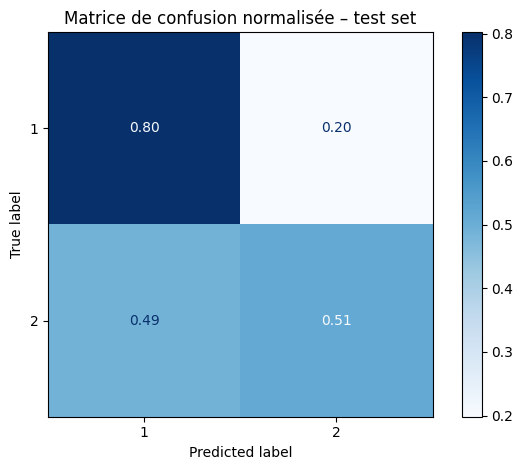

In [62]:
# ==============================================================  
# Évaluation sur le jeu de test  
# ==============================================================  
proba_test = calibrated.predict_proba(X_test)
y_pred     = calibrated.predict(X_test)

print("\n=== MÉTRIQUES TEST ===")
print("Log‑loss :", round(log_loss(y_test, proba_test), 4))
print("Brier     :", round(brier_score_loss(
    pd.get_dummies(y_test).values.ravel(),
    proba_test.ravel()
), 4))

print("\n=== RAPPORT DE CLASSIFICATION ===")
print(classification_report(y_test, y_pred, digits=3))

# Matrice de confusion normalisée
cm = confusion_matrix(y_test, y_pred, normalize="true")
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=calibrated.classes_  # ou liste personnalisée
)
disp.plot(values_format=".2f", cmap="Blues")
plt.title("Matrice de confusion normalisée – test set")
plt.tight_layout()
plt.show()  

In [46]:
def objective(trial):
    # Hyperparamètres à explorer
    C = trial.suggest_float("C", 1e-4, 100, log=True)
    penalty = trial.suggest_categorical("penalty", ["l2", "none"])
    max_iter = trial.suggest_int("max_iter", 300, 1500, step=100)
    fit_intercept = trial.suggest_categorical("fit_intercept", [True, False])
    warm_start = trial.suggest_categorical("warm_start", [True, False])
    tol = trial.suggest_float("tol", 1e-5, 1e-2, log=True)

    # Modèle
    logit = LogisticRegression(
        solver="saga",  # saga supporte l2 et none
        multi_class="multinomial",
        class_weight="balanced",
        penalty=penalty,
        C=C,
        max_iter=max_iter,
        fit_intercept=fit_intercept,
        warm_start=warm_start,
        tol=tol,
        n_jobs=-1
    )

    # Pipeline
    pipe = Pipeline([
        ("prep", preprocess),
        ("clf", logit)
    ])

    # Validation croisée
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    try:
        scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="neg_log_loss", n_jobs=-1)
        return scores.mean()
    except ValueError as e:
        trial.set_user_attr("error_msg", str(e))
        raise optuna.exceptions.TrialPruned()

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



=== RAPPORT DE CLASSIFICATION ===
              precision    recall  f1-score   support

           1      0.613     0.639     0.626     24525
           2      0.623     0.597     0.610     24524

    accuracy                          0.618     49049
   macro avg      0.618     0.618     0.618     49049
weighted avg      0.618     0.618     0.618     49049



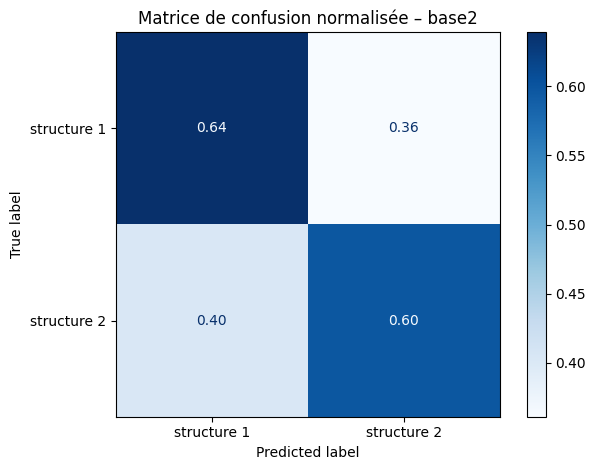

In [45]:
# 6. Prétraitement
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), var_quanti),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=True), var_quali)
    ],
    remainder="drop"
)

# 7. Modèle multinomial
logit = LogisticRegression(
    solver="saga",
    multi_class="multinomial",
    class_weight="balanced",
    max_iter=2000,
    n_jobs=-1
)

# 8. Pipeline complet
pipe = Pipeline([
    ("prep", preprocess),
    ("clf", logit)
])

# 9. Entraînement
pipe.fit(X_train, y_train)

# 10. Évaluation
y_pred = pipe.predict(X_test)
print("\n=== RAPPORT DE CLASSIFICATION ===")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["structure 1", "structure 2"])
disp.plot(values_format=".2f", cmap="Blues")
plt.title("Matrice de confusion normalisée – base2")
plt.tight_layout()
plt.show()

In [24]:
print(list(X_train.columns))

['nab50', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024', 'aac', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region']


# DIFFERENTS SEUILS

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



=== ÉVALUATION AVEC SEUIL = 0.45 POUR LA CLASSE 2 ===
Recall classe 2 : 0.6488745718479857
Precision classe 2 : 0.6040693922484152
F1-score classe 2 : 0.6256708671633868
Log-loss : 0.6828915265629127

Rapport de classification :
              precision    recall  f1-score   support

           1      0.621     0.575     0.597     24525
           2      0.604     0.649     0.626     24524

    accuracy                          0.612     49049
   macro avg      0.612     0.612     0.611     49049
weighted avg      0.612     0.612     0.611     49049



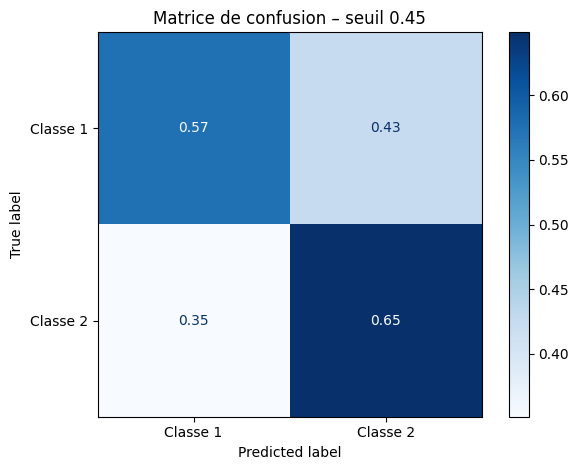


=== ÉVALUATION AVEC SEUIL = 0.55 POUR LA CLASSE 2 ===
Recall classe 2 : 0.5453841135214483
Precision classe 2 : 0.648705015035406
F1-score classe 2 : 0.5925745425546055
Log-loss : 0.6828915265629127

Rapport de classification :
              precision    recall  f1-score   support

           1      0.608     0.705     0.653     24525
           2      0.649     0.545     0.593     24524

    accuracy                          0.625     49049
   macro avg      0.628     0.625     0.623     49049
weighted avg      0.628     0.625     0.623     49049



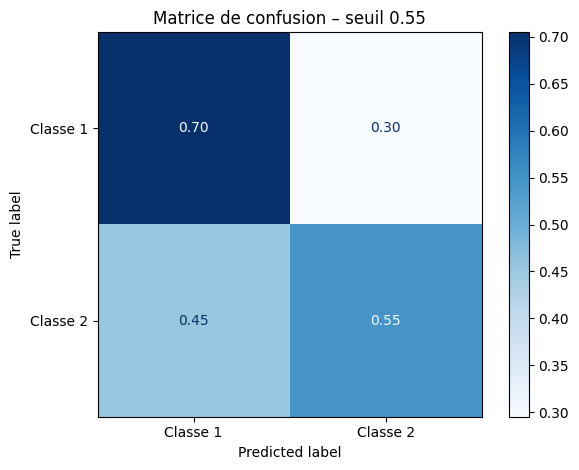

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Prétraitement
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), var_quanti),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=True), var_quali)
    ],
    remainder="drop"
)

# 2. Modèle avec les meilleurs hyperparamètres (à adapter si tu as un study)
logit = LogisticRegression(
    solver="saga",
    multi_class="multinomial",
    class_weight="balanced",
    penalty="l2",
    C=1.0,
    max_iter=1000,
    n_jobs=-1
)

# 3. Pipeline complet
pipe = Pipeline([
    ("prep", preprocess),
    ("clf", logit)
])

# 4. Entraînement
pipe.fit(X_train, y_train)

# 5. Prédiction des probabilités
proba_test = pipe.predict_proba(X_test)
proba_class2 = proba_test[:, 1]  # colonne correspondant à la classe 2

# 6. Évaluation pour seuils personnalisés
for seuil in [0.45, 0.55]:
    y_thresh = np.where(proba_class2 >= seuil, 2, 1)

    print(f"\n=== ÉVALUATION AVEC SEUIL = {seuil} POUR LA CLASSE 2 ===")
    print("Recall classe 2 :", recall_score(y_test, y_thresh, pos_label=2))
    print("Precision classe 2 :", precision_score(y_test, y_thresh, pos_label=2))
    print("F1-score classe 2 :", f1_score(y_test, y_thresh, pos_label=2))
    log_losses = -np.log(np.take_along_axis(proba_test, y_test.values.reshape(-1, 1) - 1, axis=1)).flatten()
    print("Log-loss :", np.mean(log_losses))

    print("\nRapport de classification :")
    print(classification_report(y_test, y_thresh, digits=3))

    cm = confusion_matrix(y_test, y_thresh, normalize="true")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 1", "Classe 2"])
    disp.plot(values_format=".2f", cmap="Blues")
    plt.title(f"Matrice de confusion – seuil {seuil}")
    plt.tight_layout()
    plt.show()

# XGBOOST

In [29]:
!pip install xgboost
import xgboost as xgb

  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)


In [72]:
# Remappage des classes : 1 → 0, 2 → 1
y_train = y_train.replace({1: 0, 2: 1})
y_test  = y_test.replace({1: 0, 2: 1})

In [74]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, log_loss
import matplotlib.pyplot as plt

# Prétraitement
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), var_quanti),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=True), var_quali)
    ],
    remainder="drop"
)

# Modèle XGBoost
xgb = XGBClassifier(
    objective="binary:logistic",  # ← pour 2 classes
    eval_metric="mlogloss",
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Pipeline complet
pipe_xgb = Pipeline([
    ("prep", preprocess),
    ("clf", xgb)
])

# Entraînement
pipe_xgb.fit(X_train, y_train)

# Prédictions
y_pred = pipe_xgb.predict(X_test)
y_proba = pipe_xgb.predict_proba(X_test)

# Évaluation
print("\n=== XGBOOST – RAPPORT DE CLASSIFICATION ===")
print(classification_report(y_test, y_pred, digits=3))
print("Log-loss :", round(log_loss(y_test, y_proba), 4))

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:35:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1, 7, 16, 17] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



=== XGBOOST – RAPPORT DE CLASSIFICATION ===
              precision    recall  f1-score   support

           0      0.817     0.941     0.875     24525
           1      0.931     0.790     0.855     24524

    accuracy                          0.866     49049
   macro avg      0.874     0.866     0.865     49049
weighted avg      0.874     0.866     0.865     49049

Log-loss : 0.3222


# DEBUT JOURNEE DU 10 JUILLET

# Généralisation

In [76]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [77]:
# Remappage des classes : 1 → 0, 2 → 1
datap_s['structure_id'] = datap_s['structure_id'].replace({1: 0, 2: 1})

In [78]:
datap_s['structure_id'].value_counts(normalize=True)

structure_id
1    0.918403
0    0.081597
Name: proportion, dtype: float64

In [86]:
from sklearn.preprocessing import LabelEncoder

def encode_dataframe(datap_s):
    datap_s = datap_s.copy()
    for col in datap_s.select_dtypes(include='object').columns:
        datap_s[col] = LabelEncoder().fit_transform(datap_s[col].astype(str))
    return datap_s

In [84]:
# 4. Séparer features et cible
X = datap_s.drop(columns=["structure_id", "structure_sinistre"])
y = datap_s["structure_id"]

In [ ]:
# ✂️ Séparation pool / test
X_pool, X_test, y_pool, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_pool_encoded = encode_dataframe(X_pool)
X_test_encoded = encode_dataframe(X_test)

# 📌 Indices des classes
idx_0 = np.where(y_pool == 0)[0]  # Classe minoritaire
idx_1 = np.where(y_pool == 1)[0]  # Classe majoritaire

n_models = 100
models = []
X_global = []
y_global = []

for i in range(n_models):
    # 🎯 Sélection aléatoire d’exemples de classe 1 AVEC remplacement
    sample_1 = np.random.choice(idx_1, size=len(idx_0), replace=True)

    # 🔁 Sous-base équilibrée
    selected_indices = np.concatenate((idx_0, sample_1))
    X_train = X_pool_encoded.iloc[selected_indices]
    y_train = y_pool.iloc[selected_indices]
    
    # 🔍 Vérifications défensives
    assert X_train.shape[0] > 0, f"X_train vide à l'itération {i}"
    assert y_train.shape[0] > 0, f"y_train vide à l'itération {i}"
    assert X_train.shape[0] == y_train.shape[0], f"Taille X ≠ y à l'itération {i}"

    # 📦 Stockage de la base globale
    X_global.append(X_train)
    y_global.append(y_train)

    # 🤖 Entraînement du modèle
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=i)
    model.fit(X_train, y_train)
    models.append((f"xgb_{i}", model))

# 🧠 Fusion de toutes les sous-bases équilibrées
X_global = np.concatenate(X_global)
y_global = np.concatenate(y_global)

# 🧮 Modèle d’ensemble VotingClassifier
ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(X_global, y_global)

# 📊 Évaluation sur le jeu de test fixe et déséquilibré
y_pred = ensemble.predict(X_test_encoded)
print(classification_report(y_test, y_pred, digits=4))

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:35:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:35:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\EX_RAP_STAGE\Exiom_Stage\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:35:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dt

Tu veux éviter :
- 🟥 Prédire 0 quand la vérité est 1 → Faux négatif, donc recall sur la classe 1 est crucial ici.
- 🟨 Prédire 1 quand la vérité est 0 → Faux positif, donc precision sur la classe 1 est aussi critique.


In [ ]:
# 🧼 Fonction d'encodage des colonnes catégorielles (à activer si X est un DataFrame réel)
def encode_dataframe(df):
    df_encoded = df.copy()
    for col in df_encoded.select_dtypes(include='object').columns:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))
    return df_encoded

# ✂️ Split pool et test
X_pool, X_test, y_pool, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 🧠 Encodage
X_pool_encoded = pd.DataFrame(X_pool)
X_test_encoded = pd.DataFrame(X_test)
X_pool_encoded = encode_dataframe(X_pool_encoded)
X_test_encoded = encode_dataframe(X_test_encoded)

# 📌 Indices de classe
idx_0 = np.where(y_pool == 0)[0]  # Minoritaire
idx_1 = np.where(y_pool == 1)[0]  # Majoritaire (sinistres)

# 🔍 Suivi de couverture sinistres
seen_sinistres = set()
couverture_evolution = []

# 🔄 Initialisation des modèles
n_models = 5
models = []
X_global = []
y_global = []

for i in range(n_models):
    # 🎲 Sampling aléatoire avec remplacement de classe 1
    sample_1 = np.random.choice(idx_1, size=len(idx_0), replace=True)
    seen_sinistres.update(sample_1)
    couverture = len(seen_sinistres) / len(idx_1)
    couverture_evolution.append(couverture)

    # 📦 Création sous-base équilibrée
    selected_indices = np.concatenate((idx_0, sample_1))
    X_train = X_pool_encoded.iloc[selected_indices]
    y_train = y_pool[selected_indices]

    # ✅ Sécurité
    assert X_train.shape[0] == y_train.shape[0], f"Problème d'alignement à l'itération {i}"

    X_global.append(X_train)
    y_global.append(y_train)

    # 🤖 Entraînement du modèle
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=i)
    model.fit(X_train, y_train)
    models.append((f"xgb_{i}", model))

# 📦 Fusion globale
X_global = pd.concat(X_global)
y_global = np.concatenate(y_global)

# 🧠 Score personnalisé = moyenne de précision et recall sur classe 1
def score_classe1(y_true, y_pred):
    prec = precision_score(y_true, y_pred, pos_label=1)
    rec = recall_score(y_true, y_pred, pos_label=1)
    return (prec + rec) / 2

scores = []
for name, model in models:
    y_pred = model.predict(X_test_encoded)
    score = score_classe1(y_test, y_pred)
    scores.append(score)
    print(f"🔍 {name}: Precision(1)={precision_score(y_test, y_pred, pos_label=1):.3f} | Recall(1)={recall_score(y_test, y_pred, pos_label=1):.3f} | Score={score:.3f}")

# ⚖️ Pondération des modèles
scores_array = np.array(scores)
weights = (scores_array / scores_array.sum()).tolist()

# 🧮 Ensemble VotingClassifier pondéré
ensemble = VotingClassifier(estimators=models, voting='soft', weights=weights)
ensemble.fit(X_global, y_global)

# 📊 Évaluation finale
y_pred_final = ensemble.predict(X_test_encoded)
print("\n📋 Rapport VotingClassifier :")
print(classification_report(y_test, y_pred_final, digits=4))

# 📈 Couverture finale des sinistres
print(f"\n📊 Couverture totale sinistres vus : {len(seen_sinistres)} / {len(idx_1)} → {100 * len(seen_sinistres)/len(idx_1):.2f}%")

# 📈 Graphique de la couverture
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_models+1), [100 * c for c in couverture_evolution], marker='o', color='teal')
plt.title("📈 Couverture cumulative des sinistres (classe 1)")
plt.xlabel("Itération")
plt.ylabel("Couverture (%)")
plt.ylim(0, 100)
plt.grid(True)
plt.show()

# 📊 Scores individuels des modèles
plt.figure(figsize=(8, 5))
sns.barplot(x=[name for name, _ in models], y=scores, palette="mako")
plt.title("🔍 Score (Precision + Recall) sur la classe 1 par modèle")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ⚖️ Poids attribués dans VotingClassifier
plt.figure(figsize=(8, 5))
sns.barplot(x=[name for name, _ in models], y=weights, palette="viridis")
plt.title("⚖️ Poids des modèles dans VotingClassifier")
plt.ylabel("Poids")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
ensemble.fit(X_global, y_global)
# 📊 Évaluation finale sur le jeu de test déséquilibré
y_pred_final = ensemble.predict(X_test_encoded)

# 📋 Rapport complet par classe
print("\n📋 Rapport VotingClassifier pondéré sur jeu de test :")
print(classification_report(y_test, y_pred_final, digits=4))

In [ ]:
from sklearn.metrics import confusion_matrix

# 📊 Matrice de confusion
cm = confusion_matrix(y_test, y_pred_final, labels=[0, 1])

# 🖼️ Affichage graphique
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Prédit 0", "Prédit 1"], yticklabels=["Réel 0", "Réel 1"])
plt.title("🧾 Matrice de confusion (VotingClassifier)")
plt.xlabel("Prédiction")
plt.ylabel("Vérité terrain")
plt.tight_layout()
plt.show()

# STOP JOURNEE DU 10 JUILLET

In [89]:
print(list(X_train.columns))

['cle_sin', 'date_evt', 'aac', 'age_veh', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'nab50', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [38]:
# ✂️ Séparation du pool d'entraînement et du jeu de test
X_pool, X_test, y_pool, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
idx_0 = np.where(y_pool == 0)[0]  # classe minoritaire
idx_1 = np.where(y_pool == 1)[0]  # classe majoritaire

n_models = 5
models = []

for i in range(n_models):
    # 🎲 Sélection aléatoire de classe 1, même taille que classe 0
    np.random.shuffle(idx_1)
    sample_1 = idx_1[:len(idx_0)]

    # 🔁 Combinaison avec tous les 0 (minoritaire) — pas besoin d'éviter les doublons
    selected_indices = np.concatenate((idx_0, sample_1))

    X_train = X_pool[selected_indices]
    y_train = y_pool[selected_indices]

    # 🤖 Entraînement
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=i)
    model.fit(X_train, y_train)
    models.append((f"xgb_{i}", model))

# 🧠 Fusion des modèles entraînés avec VotingClassifier
ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(X_pool[np.concatenate((idx_0, idx_1[:len(idx_0)]))],
             y_pool[np.concatenate((idx_0, idx_1[:len(idx_0)]))])

# 🧪 Évaluation
y_pred = ensemble.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

IndexError: list index out of range

In [37]:
# 🧪 Séparation en pool + test
X_pool, X_test, y_pool, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
idx_0 = np.where(y_pool == 0)[0]
idx_1 = np.where(y_pool == 1)[0]

n_models = 5
models = []

for i in range(n_models):
    # 🎲 Échantillonnage aléatoire de cas de classe 1 différents à chaque itération
    np.random.shuffle(idx_1)
    sample_1 = idx_1[:len(idx_0)]

    selected_indices = list(idx_0) + list(sample_1)

    # 🤖 Entraînement sur sous-base équilibrée
    X_train = X_pool[selected_indices]
    y_train = y_pool[selected_indices]
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=i)
    model.fit(X_train, y_train)
    models.append((f"xgb_{i}", model))

# 🧠 Fusion des modèles
ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(X_pool[np.concatenate([idx_0, idx_1[:len(idx_0)*n_models]])],
             y_pool[np.concatenate([idx_0, idx_1[:len(idx_0)*n_models]])])

# 📊 Évaluation finale
y_pred = ensemble.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

IndexError: list index out of range

In [36]:
# ✂️ Séparation en pool d'entraînement et jeu de test
X_pool, X_test, y_pool, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 📦 Initialisation
used_indices = set()
n_models = 5
models = []

# 📌 Indices des deux classes
idx_0 = np.where(y_pool == 0)[0]
idx_1 = np.where(y_pool == 1)[0]

for i in range(n_models):
    free_1 = [ix for ix in idx_1 if ix not in used_indices]
    if len(free_1) < len(idx_0):
        print(f"⛔️ Pas assez de classe 1 restantes pour équilibrer à l’itération {i}")
        break

    np.random.shuffle(free_1)
    sample_1 = free_1[:len(idx_0)]
    selected_indices = list(idx_0) + list(sample_1)
    used_indices.update(sample_1)

    # 🔧 Entraînement sur la sous-base équilibrée
    X_train = X_pool[selected_indices]
    y_train = y_pool[selected_indices]
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=i)
    model.fit(X_train, y_train)
    models.append((f"xgb_{i}", model))

# 🧠 Fusion Voting (soft)
ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(X_pool[list(used_indices) + list(idx_0)], y_pool[list(used_indices) + list(idx_0)])

# 📊 Évaluation finale
y_pred = ensemble.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

IndexError: list index out of range

# STOP

In [30]:
!pip install imbalanced-learn

In [40]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install --upgrade scikit-learn


  Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl (10.7 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [42]:
! pip install scikit-learn==1.3.2



  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl (9.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0


  You can safely remove it manually.


In [25]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (log_loss, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             brier_score_loss)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt


Variables quantitatives : ['nab50', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [30]:
list(X_train.columns)

['nab50',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE',
 'annee_sortie_veh',
 'year_2020',
 'year_2021',
 'year_2022',
 'year_2023',
 'year_2024',
 'aac',
 'sport',
 'trans',
 'suspe',
 'boite',
 'elt_secu',
 'vu',
 'pickup',
 'luxe',
 'prestige',
 'soumis_crm',
 'LIB_CHOC',
 'LIB_INTENS',
 'GARAGE_AGREE_O_N',
 'date_nais_f',
 'date_permis_f',
 'formule_ratt_g',
 'sitfam_g',
 'usage2_g',
 'orig_attest_g',
 'caros_g',
 'segment_g',
 'energ_g',
 'frein_g',
 'alim_g',
 'suspe_g',
 'crash_g',
 'fract_paiem_soc_g',
 'cdval_g',
 'modele2_g',
 'profess_g',
 'marq_g',
 'garag_g',
 'Region']

In [49]:
! pip show scikit-learn
! pip show imbalanced-learn


Name: scikit-learn
Version: 1.7.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [ ]:
! pip install "scikit-learn<1.7" --upgrade

  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0


In [ ]:
major_class_size = y_train.value_counts().max()

In [37]:
major_class_size 

736077

In [28]:
from sklearn.metrics import brier_score_loss

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [40]:
! pip install matplotlib

  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp311-cp311-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------  6.8/7.0 MB 41.7 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 33.1 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3

In [30]:
datap_s['structure_id'].value_counts(normalize=True)

structure_id
2    0.918403
1    0.081597
Name: proportion, dtype: float64

In [38]:
print(list(X_train.columns))

['nab50', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024', 'aac', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region']


In [64]:
! pip install optuna-integration[sklearn]

In [62]:
! pip install optuna

  Using cached optuna-4.4.0-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.16.2-py3-none-any.whl.metadata (7.3 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached sqlalchemy-2.0.41-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached mako-1.3.10-py3-none-any.whl.metadata (2.9 kB)
  Using cached greenlet-3.2.3-cp311-cp311-win_amd64.whl.metadata (4.2 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 2.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.8/2.1 MB 1.8 MB/s eta 0:00:01
   -------------------------

In [ ]:
# ==============================================================  
# 0. Imports  
# ==============================================================  
import optuna  
from imblearn.over_sampling import SMOTE  
from imblearn.pipeline import Pipeline as ImbPipeline  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import StratifiedKFold, cross_val_score  
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.metrics import log_loss  
import numpy as np  

# ==============================================================  
# 1. Prétraitement  
# ==============================================================  
preprocess = ColumnTransformer(  
    transformers=[  
        ("num", StandardScaler(), var_quanti),  
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=True), var_quali)  
    ],  
    remainder="drop"  
)  

# ==============================================================  
# 2. Constantes  
# ==============================================================  
minor_class = 1  
counts = y_train.value_counts()  
n_major = counts.max()  
RATIO_MIN, RATIO_MAX = 0.50, 1.00  

# ==============================================================  
# 3. Fonction objective Optuna  
# ==============================================================  
def objective(trial):  
    C = trial.suggest_float("C", 1e-3, 10, log=True)  
    ratio = trial.suggest_float("ratio", RATIO_MIN, RATIO_MAX)  

    smote = SMOTE(  
        sampling_strategy={minor_class: int(ratio * n_major)},  
        k_neighbors=5,  
        random_state=42  
    )  

    logit = LogisticRegression(  
        solver="saga",  
        class_weight="balanced",  
        C=C,  
        max_iter=400,  
        n_jobs=-1  
    )  

    pipe = ImbPipeline([  
        ("prep", preprocess),  
        ("smote", smote),  
        ("clf", logit)  
    ])  

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Réduit à 3 folds  

    try:  
        scores = cross_val_score(  
            pipe, X_train, y_train,  
            cv=cv,  
            scoring="neg_log_loss",  
            n_jobs=-1  # Parallélisation des folds  
        )  
        return scores.mean()  

    except ValueError as e:  
        trial.set_user_attr("error_msg", str(e))  
        raise optuna.exceptions.TrialPruned()  

# ==============================================================  
# 4. Optimisation  
# ==============================================================  
study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=10, show_progress_bar=True)  # Moins d’essais, durée max 30 min  

print("\n=== BEST TRIAL ===")  
print("Mean neg-logloss :", study.best_value)  
print("Hyper-params     :", study.best_params)  

# ==============================================================  
# 5. Refit avec les meilleurs paramètres  
# ==============================================================  
best_C = study.best_params["C"]  
best_ratio = study.best_params["ratio"]  

smote_best = SMOTE(  
    sampling_strategy={minor_class: int(best_ratio * n_major)},  
    k_neighbors=5,  
    random_state=42  
)  

logit_best = LogisticRegression(
    solver="saga",                # Optimiseur compatible multinomial + sparse
    multi_class="multinomial",   # ← active la régression logistique multinomiale
    class_weight="balanced",     # Gère le déséquilibre entre classes
    C=best_C,                     # Hyperparamètre optimisé
    max_iter=400,                # Nombre d’itérations max
    n_jobs=-1                    # Parallélisation
)


best_pipe = ImbPipeline([  
    ("prep", preprocess),  
    ("smote", smote_best),  
    ("clf", logit_best)  
]).fit(X_train, y_train)  

# ==============================================================  
# 6. Calibration (optionnelle)  
# ==============================================================  
from sklearn.calibration import CalibratedClassifierCV  

calibrated = CalibratedClassifierCV(  
    estimator=best_pipe,  
    method="isotonic",  
    cv=3,  # Réduit à 3 folds  
    n_jobs=-1  
).fit(X_train, y_train)  

print("\n=== METRIQUES TEST ===")  
print("Log-loss :", round(log_loss(y_test, calibrated.predict_proba(X_test)), 4))  

[I 2025-07-07 13:58:54,968] A new study created in memory with name: no-name-c0b270b0-0abb-40e8-aa4a-124584fbdcbc
Best trial: 0. Best value: -0.563894:   5%|▌         | 1/20 [17:14<5:27:35, 1034.52s/it, 1034.52/1800 seconds]

[I 2025-07-07 14:16:09,488] Trial 0 finished with value: -0.5638936659308412 and parameters: {'C': 0.06100873000233317, 'ratio': 0.9754634026023974}. Best is trial 0 with value: -0.5638936659308412.


Best trial: 1. Best value: -0.558428:  10%|█         | 2/20 [40:15<6:02:22, 1207.91s/it, 2415.81/1800 seconds]


[I 2025-07-07 14:39:10,771] Trial 1 finished with value: -0.5584275453937302 and parameters: {'C': 5.478901514882869, 'ratio': 0.7375664847363447}. Best is trial 1 with value: -0.5584275453937302.

=== BEST TRIAL ===
Mean neg-logloss : -0.5584275453937302
Hyper-params     : {'C': 5.478901514882869, 'ratio': 0.7375664847363447}


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



=== METRIQUES TEST ===


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Log-loss : 0.2703


In [41]:
y_train.value_counts(normalize=True)

structure_id
2    0.918403
1    0.081597
Name: proportion, dtype: float64

In [42]:
y_test.value_counts(normalize=True)

structure_id
2    0.918401
1    0.081599
Name: proportion, dtype: float64

In [35]:
# ==============================================================  
# 0. Imports  
# ==============================================================  
import optuna  
from imblearn.over_sampling import SMOTE  
from imblearn.pipeline import Pipeline as ImbPipeline  
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import StratifiedKFold, cross_val_score  
from sklearn.compose import ColumnTransformer  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.metrics import log_loss  
import numpy as np  

# ==============================================================  
# 1. Prétraitement  
# ==============================================================  
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), var_quanti),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=True), var_quali)
    ],
    remainder="drop"
)

# ==============================================================  
# 2. Constantes  
# ==============================================================  
minor_class = 1  
counts = y_train.value_counts()  
n_major = counts.max()  
RATIO_MIN, RATIO_MAX = 0.5, 2.0  # Étend le suréchantillonnage

# ==============================================================  
# 3. Fonction objective Optuna  
# ==============================================================  
def objective(trial):
    C = trial.suggest_float("C", 1e-3, 10, log=True)
    ratio = trial.suggest_float("ratio", RATIO_MIN, RATIO_MAX)

    smote = SMOTE(
        sampling_strategy={minor_class: int(ratio * n_major)},
        k_neighbors=5,
        random_state=42
    )

    logit = LogisticRegression(
        solver="saga",
        multi_class="multinomial",     # ← multinomial ici
        class_weight="balanced",
        C=C,
        max_iter=600,
        n_jobs=-1
    )

    pipe = ImbPipeline([
        ("prep", preprocess),
        ("smote", smote),
        ("clf", logit)
    ])

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    try:
        scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="neg_log_loss", n_jobs=-1)
        return scores.mean()
    except ValueError as e:
        trial.set_user_attr("error_msg", str(e))
        raise optuna.exceptions.TrialPruned()

# ==============================================================  
# 4. Optimisation sans timeout  
# ==============================================================  
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, show_progress_bar=True)  # ← 10 essais, pas de timeout

print("\n=== BEST TRIAL ===")
print("Mean neg-logloss :", study.best_value)
print("Hyper-params     :", study.best_params)

[I 2025-07-07 15:54:09,346] A new study created in memory with name: no-name-ec46c9a7-0e22-4634-a484-71512aa41ac6
Best trial: 0. Best value: -0.552582:  10%|█         | 1/10 [39:25<5:54:47, 2365.25s/it]

[I 2025-07-07 16:33:34,575] Trial 0 finished with value: -0.5525819982939896 and parameters: {'C': 0.13609306214999534, 'ratio': 1.1080426639492496}. Best is trial 0 with value: -0.5525819982939896.


Best trial: 0. Best value: -0.552582:  20%|██        | 2/10 [1:18:17<5:12:46, 2345.86s/it]

[I 2025-07-07 17:12:26,870] Trial 1 finished with value: -0.6073057291004575 and parameters: {'C': 0.002520234558032868, 'ratio': 0.9571270537220912}. Best is trial 0 with value: -0.5525819982939896.


Best trial: 0. Best value: -0.552582:  30%|███       | 3/10 [2:13:24<5:24:52, 2784.70s/it]

[I 2025-07-07 18:07:33,790] Trial 2 finished with value: -0.5912269887608846 and parameters: {'C': 0.005011209746919838, 'ratio': 1.8747514526432463}. Best is trial 0 with value: -0.5525819982939896.


Best trial: 3. Best value: -0.551457:  40%|████      | 4/10 [2:49:39<4:14:23, 2543.94s/it]

[I 2025-07-07 18:43:48,628] Trial 3 finished with value: -0.5514571856244918 and parameters: {'C': 0.11743316067987294, 'ratio': 0.8423290670570618}. Best is trial 3 with value: -0.5514571856244918.


Best trial: 3. Best value: -0.551457:  50%|█████     | 5/10 [3:06:43<2:46:19, 1995.99s/it]

[I 2025-07-07 19:00:53,068] Trial 4 finished with value: -0.5722935706859038 and parameters: {'C': 0.014601227088458941, 'ratio': 1.5522658891279766}. Best is trial 3 with value: -0.5514571856244918.


Best trial: 3. Best value: -0.551457:  60%|██████    | 6/10 [5:44:25<5:02:17, 4534.43s/it]

[I 2025-07-07 21:38:34,978] Trial 5 finished with value: -0.5596778758654243 and parameters: {'C': 0.026097372362929402, 'ratio': 1.7576807323793773}. Best is trial 3 with value: -0.5514571856244918.


Best trial: 3. Best value: -0.551457:  70%|███████   | 7/10 [6:29:35<3:16:53, 3938.00s/it]

[I 2025-07-07 22:23:45,050] Trial 6 finished with value: -0.5908980741815576 and parameters: {'C': 0.004986986501110416, 'ratio': 1.9284034493969366}. Best is trial 3 with value: -0.5514571856244918.


Best trial: 3. Best value: -0.551457:  80%|████████  | 8/10 [7:05:24<1:52:16, 3368.42s/it]

[I 2025-07-07 22:59:33,922] Trial 7 finished with value: -0.5926575367061021 and parameters: {'C': 4.670360613846082, 'ratio': 1.2409456955146239}. Best is trial 3 with value: -0.5514571856244918.


Best trial: 3. Best value: -0.551457:  90%|█████████ | 9/10 [7:50:45<52:45, 3165.89s/it]  

[I 2025-07-07 23:44:54,512] Trial 8 finished with value: -0.5967782599072143 and parameters: {'C': 1.8419097758932979, 'ratio': 1.946395009660732}. Best is trial 3 with value: -0.5514571856244918.


Best trial: 3. Best value: -0.551457: 100%|██████████| 10/10 [8:14:23<00:00, 2966.32s/it]

[I 2025-07-08 00:08:32,477] Trial 9 finished with value: -0.5694897966721465 and parameters: {'C': 0.6790766644371478, 'ratio': 0.7830943374600676}. Best is trial 3 with value: -0.5514571856244918.

=== BEST TRIAL ===
Mean neg-logloss : -0.5514571856244918
Hyper-params     : {'C': 0.11743316067987294, 'ratio': 0.8423290670570618}


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Ex


=== MÉTRIQUES TEST ===
Log‑loss : 0.266
Brier     : 0.0728

=== RAPPORT DE CLASSIFICATION ===
              precision    recall  f1-score   support

           1      0.000     0.000     0.000     16350
           2      0.918     1.000     0.957    184019

    accuracy                          0.918    200369
   macro avg      0.459     0.500     0.479    200369
weighted avg      0.843     0.918     0.879    200369



c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bein

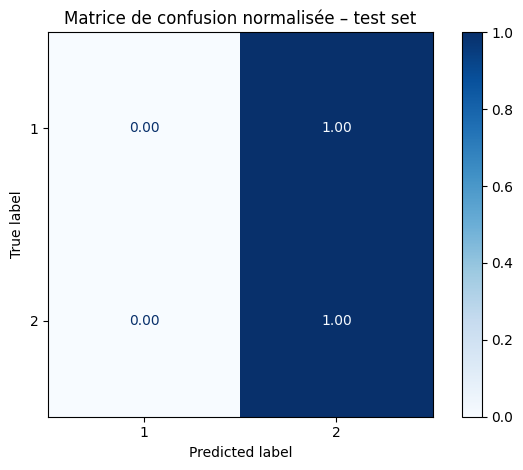

In [36]:
# ==============================================================  
# 5. Refit avec les meilleurs hyperparamètres  
# ==============================================================  
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    log_loss, brier_score_loss, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import pandas as pd

# Récupération des meilleurs paramètres
best_C = study.best_params["C"]
best_ratio = study.best_params["ratio"]

# SMOTE avec le meilleur ratio
smote_best = SMOTE(
    sampling_strategy={minor_class: int(best_ratio * n_major)},
    k_neighbors=5,
    random_state=42
)

# Modèle logistique multinomial
logit_best = LogisticRegression(
    solver="saga",
    multi_class="multinomial",
    class_weight="balanced",
    C=best_C,
    max_iter=600,
    n_jobs=-1
)

# Pipeline complet
best_pipe = ImbPipeline([
    ("prep", preprocess),
    ("smote", smote_best),
    ("clf", logit_best)
])

# Calibration sur le train
calibrated = CalibratedClassifierCV(
    estimator=best_pipe,
    method="isotonic",
    cv=3,
    n_jobs=-1
).fit(X_train, y_train)

# ==============================================================  
# 6. Évaluation sur le jeu de test  
# ==============================================================  
proba_test = calibrated.predict_proba(X_test)
y_pred     = calibrated.predict(X_test)

print("\n=== MÉTRIQUES TEST ===")
print("Log‑loss :", round(log_loss(y_test, proba_test), 4))
print("Brier     :", round(brier_score_loss(
    pd.get_dummies(y_test).values.ravel(),
    proba_test.ravel()
), 4))

print("\n=== RAPPORT DE CLASSIFICATION ===")
print(classification_report(y_test, y_pred, digits=3))

# Matrice de confusion normalisée
cm = confusion_matrix(y_test, y_pred, normalize="true")
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=calibrated.classes_  # ou liste personnalisée
)
disp.plot(values_format=".2f", cmap="Blues")
plt.title("Matrice de confusion normalisée – test set")
plt.tight_layout()
plt.show()

In [ ]:
# 5. Re‑fit avec les meilleurs hyper‑paramètres
# ==============================================================
best_C     = study.best_value["C"]
best_ratio = study.best_params["ratio"]

smote_best = SMOTE(
    sampling_strategy={minor_class: int(best_ratio * n_major)},
    k_neighbors=5,
    random_state=42
)

logit_best = LogisticRegression(
    solver="saga",
    class_weight="balanced",
    C=best_C,
    max_iter=400,
    n_jobs=-1
)

best_pipe = ImbPipeline([
    ("prep",  preprocess),
    ("smote", smote_best),
    ("clf",   logit_best)
]).fit(X_train, y_train)



# ==============================================================
# 6. (Option) calibration
# ==============================================================
from sklearn.calibration import CalibratedClassifierCV

calibrated = CalibratedClassifierCV(
    estimator=best_pipe,
    method="isotonic",
    cv=5,
    n_jobs=-1
).fit(X_train, y_train)

print("\n=== METRIQUES TEST ===")
print("Log‑loss :", log_loss(y_test, calibrated.predict_proba(X_test)).round(4))


In [ ]:
# ==============================================================
# 0. Imports
# ==============================================================
import optuna
from imblearn.over_sampling import SMOTE
from imblearn.pipeline      import Pipeline as ImbPipeline
from sklearn.linear_model   import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.compose        import ColumnTransformer
from sklearn.preprocessing  import StandardScaler, OneHotEncoder
from sklearn.metrics        import log_loss
import numpy as np

# ==============================================================
# 1. Prétraitement (One‑Hot sparse + StandardScaler)
# ==============================================================
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), var_quanti),
        ("cat", OneHotEncoder(drop="first",
                              handle_unknown="ignore",
                              sparse_output=True),
                var_quali)
    ],
    remainder="drop"
)

# ==============================================================
# 2. Constantes globales
# ==============================================================
minor_class = 1                                # classe rare à booster
counts      = y_train.value_counts()
n_major     = counts.max()                     # effectif classe dominante

# Limites raisonnables : 0.5 (minorité = 50 % de majorité) à 1.0
RATIO_MIN, RATIO_MAX = 0.50, 1.00

# ==============================================================
# 3. Fonction objective Optuna
# ==============================================================
def objective(trial):

    # --- hyper‑paramètres explorés ---------------------------------
    C      = trial.suggest_float("C", 1e-3, 10, log=True)
    ratio  = trial.suggest_float("ratio", RATIO_MIN, RATIO_MAX)

    smote = SMOTE(
        sampling_strategy={minor_class: int(ratio * n_major)},
        k_neighbors=5,
        random_state=42
    )

    logit = LogisticRegression(
        solver="saga",             # accepte CSR
        class_weight="balanced",
        C=C,
        max_iter=400,
        n_jobs=-1
    )

    pipe = ImbPipeline([
        ("prep",  preprocess),
        ("smote", smote),
        ("clf",   logit)
    ])

    # --- validation croisée ---------------------------------------
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    try:
        scores = cross_val_score(
            pipe, X_train, y_train,
            cv=cv,
            scoring="neg_log_loss",   # log‑loss (négatif) natif
            n_jobs=1
        )
        return scores.mean()          # Optuna maximise -> valeur négative OK

    except ValueError as e:
        # stocke l'erreur pour diagnostic et prune l’essai
        trial.set_user_attr("error_msg", str(e))
        raise optuna.exceptions.TrialPruned()

# ==============================================================
# 4. Lancement de l’optimisation
# ==============================================================
study = optuna.create_study(direction="maximize")   # maximise le score négatif
study.optimize(objective, n_trials=40, timeout=3600, show_progress_bar=True)

print("\n=== BEST TRIAL ===")
print("Mean neg‑logloss :", study.best_value)
print("Hyper‑params     :", study.best_params)

# ==============================================================
# 5. Re‑fit avec les meilleurs hyper‑paramètres
# ==============================================================
best_C     = study.best_params["C"]
best_ratio = study.best_params["ratio"]

smote_best = SMOTE(
    sampling_strategy={minor_class: int(best_ratio * n_major)},
    k_neighbors=5,
    random_state=42
)

logit_best = LogisticRegression(
    solver="saga",
    class_weight="balanced",
    C=best_C,
    max_iter=400,
    n_jobs=-1
)

best_pipe = ImbPipeline([
    ("prep",  preprocess),
    ("smote", smote_best),
    ("clf",   logit_best)
]).fit(X_train, y_train)

# ==============================================================
# 6. (Option) calibration
# ==============================================================
from sklearn.calibration import CalibratedClassifierCV

calibrated = CalibratedClassifierCV(
    estimator=best_pipe,
    method="isotonic",
    cv=5,
    n_jobs=-1
).fit(X_train, y_train)

print("\n=== METRIQUES TEST ===")
print("Log‑loss :", log_loss(y_test, calibrated.predict_proba(X_test)).round(4))


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Ex


=== METRIQUES TEST ===
Log‑loss : 0.2703116939938663
Brier     : 0.07328027823271355

               precision    recall  f1-score   support

           1      0.000     0.000     0.000     16350
           2      0.918     1.000     0.957    184019

    accuracy                          0.918    200369
   macro avg      0.459     0.500     0.479    200369
weighted avg      0.843     0.918     0.879    200369



c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bein

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (3).

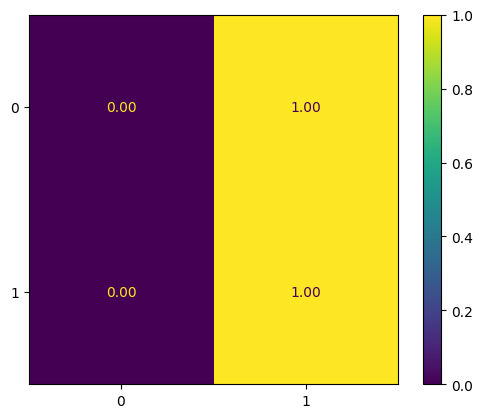

In [34]:
# ---------------------------------------------------------------------------
# 9. ÉVALUATION SUR LE TEST ---------------------------------------------------
# ---------------------------------------------------------------------------
import matplotlib.pyplot as plt

proba_test = calibrated.predict_proba(X_test)
y_pred     = calibrated.predict(X_test)

print("\n=== METRIQUES TEST ===")
print("Log‑loss :", log_loss(y_test, proba_test))
print("Brier     :", brier_score_loss(
    pd.get_dummies(y_test).values.ravel(), proba_test.ravel()))
print("\n", classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["MO+Peinture",
                                              "MO+Pièces",
                                              "MO+Peinture+Pièces"])
disp.plot(values_format=".2f")
plt.title("Confusion matrix normalisée – test set")
plt.tight_layout()
plt.show()

In [43]:
y_test, y_pred

(620863    3
 43778     3
 152872    3
 622096    3
 230343    3
          ..
 889052    3
 143147    3
 20141     3
 671825    3
 133555    3
 Name: structure_id, Length: 200369, dtype: int64,
 array([3, 3, 3, ..., 3, 3, 3], shape=(200369,)))

In [44]:
df_comparaison = pd.DataFrame({
    'Valeur réelle': y_test,
    'Valeur prédite': y_pred  # ou 'Probabilité prédite': proba_test
})



In [45]:
df_comparaison.head(100)

,Valeur réelle,Valeur prédite
620863,3,3
43778,3,3
152872,3,3
622096,3,3
230343,3,3
...,...,...
606410,3,3
504960,1,1
15282,1,1
728987,3,3


In [ ]:
# ---------------------------------------------------------------------------
# 10. PRÉDICTION POUR UN NOUVEAU SINISTRE ------------------------------------
# ---------------------------------------------------------------------------
nouveau = pd.DataFrame({
    "age_vehicule": [4],
    "puissance_fiscale": [6],
    "km_parcourus": [47_000],
    "type_choc": ["arrière"],
    "zone_impact": ["pare_chocs"],
    "carrosserie": ["berline"],
    "energie": ["essence"]
})

proba_nouveau = cal_clf.predict_proba(nouveau)[0]
print("\nP(combos | sinistre) :", proba_nouveau)
print("  ↳ MO+Peinture        :", proba_nouveau[0])
print("  ↳ MO+Pièces          :", proba_nouveau[1])
print("  ↳ MO+Peinture+Pièces :", proba_nouveau[2])

# ---------------------------------------------------------------------------
# 11. SAUVEGARDE DU PIPELINE CALIBRÉ -----------------------------------------
# ---------------------------------------------------------------------------
joblib.dump(cal_clf, "artifacts/combo_classifier.pkl")
print("\n✅  Pipeline sauvegardé : artifacts/combo_classifier.pkl")

In [63]:
vars_final_num = [col for col in vars_final_num if col != 'structure_id']


In [27]:
import sklearn
print(sklearn.__version__)


1.7.0


# 30 JUIN

# STOP 

In [43]:
y_pred = clf.predict(X_test_ohe)


In [65]:
# En tableau côte à côte
comparaison = pd.DataFrame({
    "réel": y_test.values,
    "prévu": y_pred
})

print(comparaison.head(20))  # Affiche les 20 premières lignes

    réel  prévu
0      5      5
1      5      5
2      5      2
3      2      5
4      5      2
5      2      5
6      5      5
7      5      2
8      2      5
9      5      2
10     5      5
11     5      5
12     2      5
13     5      2
14     5      5
15     5      2
16     5      5
17     5      2
18     5      2
19     5      2


Accuracy : 0.6930463295220318
Précision : 0.8719043443871974
Rappel : 0.6930463295220318
F1-score : 0.7604240433091027

Rapport complet :
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.13      0.47      0.20     16270
           3       0.00      0.01      0.00        71
           4       0.00      0.00      0.00         5
           5       0.94      0.71      0.81    184020

    accuracy                           0.69    200369
   macro avg       0.21      0.24      0.20    200369
weighted avg       0.87      0.69      0.76    200369



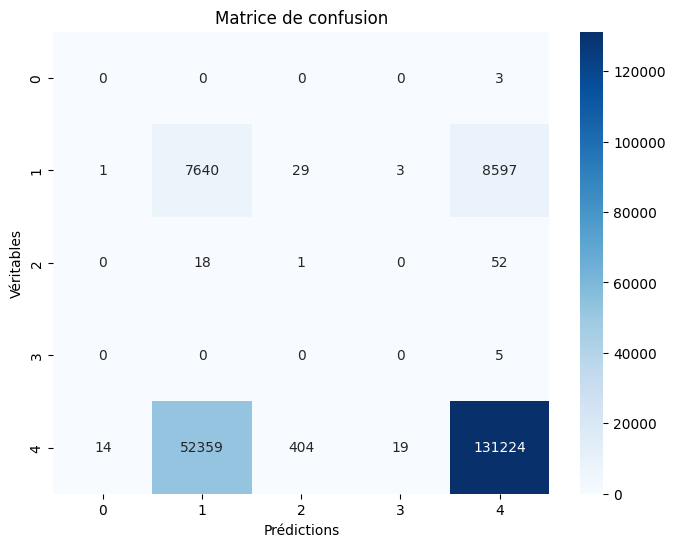

In [66]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# ⚡ Score global
print("Accuracy :", accuracy_score(y_test, y_pred))

# 🎯 Précision, Rappel, F1-score
print("Précision :", precision_score(y_test, y_pred, average='weighted'))
print("Rappel :", recall_score(y_test, y_pred, average='weighted'))
print("F1-score :", f1_score(y_test, y_pred, average='weighted'))

# 🧾 Rapport complet
print("\nRapport complet :\n", classification_report(y_test, y_pred))

# 🔥 Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables")
plt.show()


In [91]:
print("X_res shape :", X_res.shape)
print("X_test_ohe shape :", X_test_ohe.shape)
print("Are they equal ?", np.array_equal(X_res, X_test_ohe))

X_res shape : (3680385, 56075)
X_test_ohe shape : (200369, 56075)
Are they equal ? False


In [92]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train_ohe, y_train)
print("Top 10 variables les plus informatives :", np.argsort(mi)[-10:])


KeyboardInterrupt: 

In [40]:
# Probabilité prédite pour chaque classe (multinomial)
probas = model.predict_proba(X_test)

# Par exemple, pour les 5 premières observations
proba_df = pd.DataFrame(probas, columns=model.named_steps["clf"].classes_)
print(proba_df.head())


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


          1         2         3         4         5
0  0.189413  0.210490  0.197884  0.188746  0.213468
1  0.209747  0.206348  0.207360  0.164910  0.211634
2  0.173038  0.240725  0.205586  0.131159  0.249492
3  0.207617  0.232664  0.210403  0.116494  0.232822
4  0.226656  0.223051  0.205944  0.129953  0.214396


METRIQUES

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


F1_macro             0.1429
Balanced_accuracy    0.2644
Precision_macro      0.2205
Recall_macro         0.2644
Log_loss             1.5655
Cohen_kappa          0.0314
dtype: float64


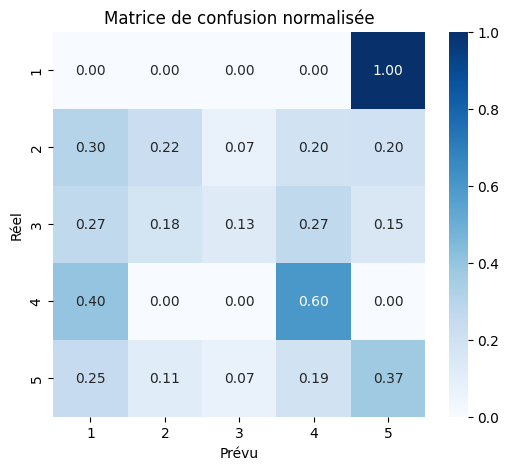

In [41]:
from sklearn.metrics import (
    f1_score, balanced_accuracy_score,
    precision_score, recall_score,
    log_loss, cohen_kappa_score,
    confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# y_test  : vraies classes
# y_pred  : classes prédites           → clf.predict(X_test)
# y_proba : probas par classe (n×K)    → clf.predict_proba(X_test)
# -------------------------------------------------------------
y_pred  = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# ---- 1. Métriques numériques --------------------------------
metrics = {
    "F1_macro"          : f1_score(y_test, y_pred, average="macro"),
    "Balanced_accuracy" : balanced_accuracy_score(y_test, y_pred),
    "Precision_macro"   : precision_score(y_test, y_pred, average="macro", zero_division=0),
    "Recall_macro"      : recall_score(y_test, y_pred, average="macro", zero_division=0),
    "Log_loss"          : log_loss(y_test, y_proba),
    "Cohen_kappa"       : cohen_kappa_score(y_test, y_pred)
}

print(pd.Series(metrics).round(4))

# ---- 2. Matrice de confusion normalisée ---------------------
labels = sorted(y_test.unique())           # classes dans l’ordre
cm      = confusion_matrix(y_test, y_pred, labels=labels, normalize="true")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prévu"); plt.ylabel("Réel");
plt.title("Matrice de confusion normalisée");
plt.show()


En clair : le classifieur prédit presque tout le temps 5 (MO+IP+PIECES), sauf quelques 2 (≈ 20 %) — normal vu l’énorme déséquilibre.

Pourquoi ce comportement ?
Déséquilibre extrême : classe 5 ≈ 91 % des sinistres.

Pas (ou peu) de pondération : la log-vraisemblance est quasi entièrement pilotée par la classe majoritaire.

Classes 1, 3, 4 trop petites (≤ 0 .05 %) ↗ impossible pour un modèle multinomial standard d’apprendre quoi que ce soit.

In [30]:
datap_s.head()

,cle_sin,date_evt,age,aac,age_veh,pkw,poidspuiss,sport,trans,suspe,...,marq_g,garag_g,Region,structure_sinistre,structure_id,year_2020,year_2021,year_2022,year_2023,year_2024
0,191840439C A 018,02/01/2019,84.0,N,3.0,66.0,12.0,nn_spt,AV,4RI,...,Généralistes,Petit garage,Nouvelle-Aquitaine,MO+IP+PIECES,5,0,0,0,0,0
1,191840048C A 001,01/01/2019,18.0,O,6.0,51.5,15.0,nn_spt,AV,4RI,...,Autres,Garage moyen,Pays de la Loire,MO+IP+PIECES,5,0,0,0,0,0
2,191840501C A 010,03/01/2019,67.0,N,6.0,180.0,7.0,spt,RM,4RI,...,Premium,Garage moyen,Pays de la Loire,MO+IP+PIECES,5,0,0,0,0,0
3,191840759C A 001,06/01/2019,40.0,N,12.0,78.0,13.0,nn_spt,AV,4RI,...,Généralistes,Garage moyen,Pays de la Loire,MO+IP+PIECES,5,0,0,0,0,0
4,191840075AV A 003,01/01/2019,47.0,N,3.0,84.0,12.0,nn_spt,AV,4RI,...,Généralistes,Garage moyen,NaN,MO+IP+PIECES,5,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe_lasso = Pipeline([
    ('prep', preprocessor),                        # One-hot + numériques
    ('clf',  LogisticRegression(
                penalty='l1', solver='saga',
                multi_class='multinomial', max_iter=400))
])

param_C = {'clf__C': np.logspace(-3, 2, 12)}      # grille de pénalités
cv      = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_lasso = GridSearchCV(pipe_lasso,
                          param_grid=param_C,
                          cv=cv,
                          scoring='neg_log_loss',
                          n_jobs=-1)
grid_lasso.fit(datap_s[qual_vars + quant_vars + year_dummies], datap_s['structure_id'])

print("C optimal :", grid_lasso.best_params_['clf__C'])
print("Log-loss :", -grid_lasso.best_score_)

# variables conservées (≠ 0)
best_clf   = grid_lasso.best_estimator_.named_steps['clf']
coef_mask  = np.any(best_clf.coef_ != 0, axis=0)
selected   = np.array(grid_lasso.best_estimator_
                      .named_steps['prep']
                      .get_feature_names_out())[coef_mask]
print("Variables retenues par Lasso :", selected)


In [ ]:
import statsmodels.api as sm

def stepwise_selection(X, y, criterion='bic'):
    """Simplifié : ajoute/supprime jusqu’à ce que BIC (ou AIC) cesse d’améliorer."""
    remaining = list(X.columns)
    selected  = []
    current_score, best_new_score = np.inf, np.inf
    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            model = sm.MNLogit(y, sm.add_constant(X[selected + [candidate]])).fit(disp=0)
            score = model.bic if criterion=='bic' else model.aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        else:
            break
    return selected

X_step = pd.get_dummies(datap_s[qual_vars + quant_vars + year_dummies], drop_first=True)
y      = datap_s['structure_id']
vars_BIC = stepwise_selection(X_step, y, criterion='bic')
print("Variables retenues (BIC) :", vars_BIC)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(n_estimators=500, random_state=42)
X_rf = pd.get_dummies(datap_s[qual_vars + quant_vars + year_dummies], drop_first=True)
rf.fit(X_rf, y)

perm = permutation_importance(rf, X_rf, y,
                              scoring='neg_log_loss', n_repeats=5, n_jobs=-1)
imp  = pd.Series(perm.importances_mean, index=X_rf.columns).sort_values(ascending=False)
print("Top 20 importances permutation :")
print(imp.head(20))


# COPULE

In [67]:
! pip install copulas


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from copulas.multivariate import GumbelCopula

# Supposons que tu as ces colonnes binaires dans datap : 'MO', 'IP', 'PIECES'
# Et X_bal, y_bal sont tes données d'entraînement (pandas DataFrame / Series)

# 1. Estimer les marges (modèles logistiques binaires)
def fit_margins(X, features):
    marg_probs = {}
    for feat in features:
        model = LogisticRegression(solver='lbfgs', max_iter=200)
        model.fit(X.drop(columns=[f for f in features if f != feat]), X[feat])
        marg_probs[feat] = model.predict_proba(X.drop(columns=[f for f in features if f != feat]))[:,1]
    return marg_probs

# MAIS ici, mieux vaut juste utiliser les colonnes directement, car ce sont des colonnes binaires !
# On peut directement prendre les proportions empiriques ou une régression simple sur X_bal

# Simplifions : on prend les marges empiriques sur X_bal

features = ['MO', 'IP', 'PIECES']

marg_probs = {}
for feat in features:
    marg_probs[feat] = X_bal[feat].mean()  # moyenne simple (empirique)

print("Marges empiriques : ", marg_probs)

# 2. Transformer les marges en U(0,1)
# Ici on doit récupérer les observations sous forme uniformes.
# Pour ça, on prend les colonnes MO, IP, PIECES (0/1)
U = X_bal[features].copy()
# Les marges en 0/1 sont triviales, on convertit en uniformes comme suit :
# Soit U_i = F_i(x_i) = prob d'observer <= x_i, pour une variable binaire,
# on peut approximer par la CDF empirique :
# 0 => prob(=0)
# 1 => prob(<=1) = 1
for feat in features:
    p0 = 1 - marg_probs[feat]  # prob d'être 0
    # U=0 => p0, U=1 => 1
    U[feat] = U[feat].apply(lambda x: p0 if x==0 else 1.0)

# 3. Estimer la copule Gumbel sur les données uniformes
copula = GumbelCopula()
copula.fit(U.values)

# 4. Calculer les probabilités jointes pour chaque combinaison possible
# Rappel map_id :
# 1 = MO
# 2 = MO+IP
# 3 = MO+PIECES
# 4 = IP+PIECES
# 5 = MO+IP+PIECES

def prob_structure_id(copula, marg_probs, comb):
    # comb : dict {feat: 0/1}
    # On calcule P(X_1=x1, X_2=x2, X_3=x3) via la copule et marges :
    # Copule donne C(u1, u2, u3) où u_i = F_i(x_i)
    # Pour binaire, on fait P(X=1) = 1 - F(0)
    # Ici on utilise la formule d'inclusion-exclusion via les copules

    # Pour chaque variable, calculer u_i = F_i(x_i)
    # Pour x_i=1, u_i = 1
    # Pour x_i=0, u_i = p0_i

    u = []
    for feat in features:
        p0 = 1 - marg_probs[feat]
        u_i = 1 if comb[feat]==1 else p0
        u.append(u_i)

    # Inclusion-exclusion classique pour binaire
    # P(X1=x1,X2=x2,X3=x3) = 
    #   C(u) - sum sur les marges inférieures selon x_i=0
    # Utiliser CDF de la copule aux bons points

    # On énumère toutes les sous-vecteurs v <= u selon x_i=0
    # En fait pour binaire on a 8 combinaisons (0/1)^3.
    # On calcule selon les variables 0 ou 1 :
    # P = sum_{S subseteq variables où x_i=0} (-1)^|S| C(u_S)
    # où u_S remplace les composantes de u par 0 si i in S

    # Simplifions : on utilise la formule donnée par Joe (copule multinomial binaire)
    # Le plus simple : calculer la probabilité par la différence de CDF de copule
    # Pour 3 variables, ça donne :

    u_vec = np.array(u)
    # Les bornes pour la probabilité sont toutes les combinaisons où on remplace les 1 par leurs u_i ou par 0

    # On crée la liste des indices où x_i=0
    zero_idx = [i for i, val in enumerate(comb.values()) if val==0]

    # On va faire la somme sur les sous-ensembles de zero_idx
    from itertools import combinations
    prob = 0
    for k in range(len(zero_idx)+1):
        for subset in combinations(zero_idx, k):
            # construire vecteur v pour la copule C(v)
            v = u_vec.copy()
            for idx in subset:
                v[idx] = 0
            sign = (-1)**k
            prob += sign * copula.cdf(v)
    return prob

# 5. Afficher les proba de chaque structure_id
combinations = {
    1: {'MO':1, 'IP':0, 'PIECES':0},
    2: {'MO':1, 'IP':1, 'PIECES':0},
    3: {'MO':1, 'IP':0, 'PIECES':1},
    4: {'MO':0, 'IP':1, 'PIECES':1},
    5: {'MO':1, 'IP':1, 'PIECES':1},
}

for cid, comb in combinations.items():
    p = prob_structure_id(copula, marg_probs, comb)
    print(f"Probabilité structure_id = {cid} ({comb}): {p:.5f}")

# Note : la somme des proba des 5 classes + P(aucun) doit être proche de 1.
# On peut aussi calculer la probabilité d'aucun activé (MO=IP=PIECES=0) si besoin.



In [71]:
vars_final

['age',
 'aac',
 'age_veh',
 'pkw',
 'poidspuiss',
 'sport',
 'trans',
 'suspe',
 'boite',
 'val',
 'couple',
 'airbag',
 'co2min',
 'elt_secu',
 'vu',
 'pickup',
 'luxe',
 'prestige',
 'soumis_crm',
 'crm',
 'boncond',
 'nab50',
 'LIB_CHOC',
 'LIB_INTENS',
 'GARAGE_AGREE_O_N',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE',
 'annee_sortie_veh',
 'date_nais_f',
 'date_permis_f',
 'formule_ratt_g',
 'sitfam_g',
 'usage2_g',
 'orig_attest_g',
 'caros_g',
 'segment_g',
 'energ_g',
 'frein_g',
 'alim_g',
 'suspe_g',
 'crash_g',
 'fract_paiem_soc_g',
 'cdval_g',
 'modele2_g',
 'profess_g',
 'marq_g',
 'garag_g',
 'Region',
 'structure_sinistre',
 'structure_id',
 'year_2020',
 'year_2021',
 'year_2022',
 'year_2023',
 'year_2024']